<a href="https://colab.research.google.com/github/itcheeban/gsr_alliance_mentoring/blob/main/NYC_Casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#importing the libraries
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels.api as sm

In [70]:
#pulling the data
nyc_all_data = pd.read_csv('nyc_data.csv')

/tmp/ipython-input-2378417645.py:2: DtypeWarning:

Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.



In [71]:
nyc_all_data.describe()

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,1.961090e+06,1.961090e+06,2.201262e+06,2.201249e+06,2.201280e+06,2.201280e+06,2.201280e+06,2.201280e+06,2.201280e+06,2.201280e+06,2.201280e+06
mean,4.059810e+01,-7.369829e+01,3.258308e-01,1.572289e-03,5.917375e-02,7.795464e-04,2.879007e-02,1.235645e-04,2.333415e-01,6.396279e-04,3.251978e+06
std,2.261323e+00,4.210573e+00,7.129483e-01,4.187302e-02,2.492158e-01,2.855314e-02,1.694265e-01,1.115607e-02,6.741476e-01,2.761854e-02,1.508865e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066737e+01,-7.397457e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.186441e+06
50%,4.072032e+01,-7.392683e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.736924e+06
75%,4.076958e+01,-7.386660e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.287464e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.838067e+06


In [72]:
nyc_all_data.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,11/01/2023,1:29,BROOKLYN,11230.0,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


In [73]:
#check for any duplicates - starting from Collision ID column
duplicates_collision_id = nyc_all_data['COLLISION_ID'].value_counts(sort=True, ascending=False)
dv_collision_id = duplicates_collision_id[duplicates_collision_id>1]
print(dv_collision_id)

Series([], Name: count, dtype: int64)


Looks like the data doesnt have any duplicates for Collision ID

In [74]:
nyc_all_data['BOROUGH'].describe()

,BOROUGH
count,1524803
unique,5
top,BROOKLYN
freq,488166


In [75]:
nyc_all_data['BOROUGH'].describe()

,BOROUGH
count,1524803
unique,5
top,BROOKLYN
freq,488166


In [76]:
#check if there are any NAs
nyc_all_data.isnull().sum()

,0
CRASH DATE,0
CRASH TIME,0
BOROUGH,676477
ZIP CODE,676752
LATITUDE,240190
LONGITUDE,240190
LOCATION,240190
ON STREET NAME,477734
CROSS STREET NAME,840711
OFF STREET NAME,1815920


In [78]:
#checking for Borough as null
nyc_all_data[nyc_all_data['BOROUGH'].isnull()].isnull().sum()

# Looks like if i drop na for Borough, it can be a better data

,0
CRASH DATE,0
CRASH TIME,0
BOROUGH,676477
ZIP CODE,676477
LATITUDE,202457
LONGITUDE,202457
LOCATION,202457
ON STREET NAME,128311
CROSS STREET NAME,490701
OFF STREET NAME,639979


In [79]:
#dropping NA for borough
nyc = nyc_all_data[nyc_all_data['BOROUGH'].notnull()]
nyc.isnull().sum()

,0
CRASH DATE,0
CRASH TIME,0
BOROUGH,0
ZIP CODE,275
LATITUDE,37733
LONGITUDE,37733
LOCATION,37733
ON STREET NAME,349423
CROSS STREET NAME,350010
OFF STREET NAME,1175941


In [80]:
# We see NA for persons injured and killed - assigning 0 for these as they are going to be an dependent variable for us
# nyc['NUMBER OF PERSONS INJURED'] = nyc['NUMBER OF PERSONS INJURED'].fillna(0)
# nyc['NUMBER OF PERSONS KILLED'] = nyc['NUMBER OF PERSONS KILLED'].fillna(0)
nyc.loc[:, ['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']] = nyc.loc[:, ['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']].fillna(0)
nyc.isnull().sum()

,0
CRASH DATE,0
CRASH TIME,0
BOROUGH,0
ZIP CODE,275
LATITUDE,37733
LONGITUDE,37733
LOCATION,37733
ON STREET NAME,349423
CROSS STREET NAME,350010
OFF STREET NAME,1175941


In [81]:
per_inj = nyc['NUMBER OF PERSONS INJURED'].sum()
ped_inj = nyc['NUMBER OF PEDESTRIANS INJURED'].sum()
cyc_inj = nyc['NUMBER OF CYCLIST INJURED'].sum()
mot_inj = nyc['NUMBER OF MOTORIST INJURED'].sum()

# Calculate the sum of pedestrians, cyclists, and motorists injured
ped_cyc_mot_sum = ped_inj + cyc_inj + mot_inj

# Check if the sum of pedestrian, cyclist, and motorist injuries equals the total injuries
compare = per_inj == ped_cyc_mot_sum

# Combine the results into a single DataFrame
summary_table = pd.DataFrame({
    'Persons Injured': [per_inj],
    'Pedestrians Injured': [ped_inj],
    'Cyclist Injured': [cyc_inj],
    'Motorist Injured': [mot_inj],
    'ped + cyc + mot': [ped_cyc_mot_sum],
    'compare': [compare]
})
summary_table

,Persons Injured,Pedestrians Injured,Cyclist Injured,Motorist Injured,ped + cyc + mot,compare
0,472141.0,104680,49710,310114,464504,False


In [82]:
per_kill = nyc['NUMBER OF PERSONS KILLED'].sum()
ped_kill = nyc['NUMBER OF PEDESTRIANS KILLED'].sum()
cyc_kill = nyc['NUMBER OF CYCLIST KILLED'].sum()
mot_kill = nyc['NUMBER OF MOTORIST KILLED'].sum()

# Calculate the sum of pedestrians, cyclists, and motorists injured
ped_cyc_mot_sum = ped_kill + cyc_kill + mot_kill

# Check if the sum of pedestrian, cyclist, and motorist injuries equals the total injuries
compare = per_kill == ped_cyc_mot_sum

# Combine the results into a single DataFrame
summary_table = pd.DataFrame({
    'Persons Killed': [per_kill],
    'Pedestrians Killed': [ped_kill],
    'Cyclist Killed': [cyc_kill],
    'Motorist Killed': [mot_kill],
    'ped + cyc + mot': [ped_cyc_mot_sum],
    'compare': [compare]
})
summary_table

,Persons Killed,Pedestrians Killed,Cyclist Killed,Motorist Killed,ped + cyc + mot,compare
0,2078.0,1151,197,688,2036,False


In [83]:
# we are more interested if there was an injury or someone was killed and not really interested in how many as thats somthing not in our control
# Injured flag and killed flag to identify the collision result

# Creating injured_flag column using .loc
nyc.loc[:, 'injured_flag'] = np.where((nyc['NUMBER OF PERSONS INJURED'] > 0) |
                                      (nyc['NUMBER OF PEDESTRIANS INJURED'] > 0) |
                                      (nyc['NUMBER OF CYCLIST INJURED'] > 0) |
                                      (nyc['NUMBER OF MOTORIST INJURED'] > 0), 1, 0)

# Creating killed_flag column using .loc
nyc.loc[:, 'killed_flag'] = np.where((nyc['NUMBER OF PERSONS KILLED'] > 0) |
                                     (nyc['NUMBER OF PEDESTRIANS KILLED'] > 0) |
                                     (nyc['NUMBER OF CYCLIST KILLED'] > 0) |
                                     (nyc['NUMBER OF MOTORIST KILLED'] > 0), 1, 0)

/tmp/ipython-input-3090539210.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-3090539210.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Data Manipulation - Treatment of NAs, creating dataset with required fields only and creating additional fields

In [84]:
# Calculate the count of NaN values for each column
nan_counts = nyc.isna().sum()

# Calculate the total count of non-NaN entries for each column
total_counts = nyc.count()

# Combine the results into a single DataFrame
summary_table = pd.DataFrame({
    'NaN Count': nan_counts,
    'Total Count': total_counts
})
summary_table

,NaN Count,Total Count
CRASH DATE,0,1524803
CRASH TIME,0,1524803
BOROUGH,0,1524803
ZIP CODE,275,1524528
LATITUDE,37733,1487070
LONGITUDE,37733,1487070
LOCATION,37733,1487070
ON STREET NAME,349423,1175380
CROSS STREET NAME,350010,1174793
OFF STREET NAME,1175941,348862


In [85]:
#creating df with only required fields
nyc_data = nyc.loc[:,['COLLISION_ID','CRASH DATE','CRASH TIME','BOROUGH','ZIP CODE','LOCATION','injured_flag','killed_flag','CONTRIBUTING FACTOR VEHICLE 1','CONTRIBUTING FACTOR VEHICLE 2','VEHICLE TYPE CODE 1','VEHICLE TYPE CODE 2']]

In [86]:
# List of columns to fill NAs
columns_to_fill = [
    'CONTRIBUTING FACTOR VEHICLE 1',
    'CONTRIBUTING FACTOR VEHICLE 2',
    'VEHICLE TYPE CODE 1',
    'VEHICLE TYPE CODE 2'
]

# Fill NAs in the specified columns with 'Unspecified'
nyc_data[columns_to_fill] = nyc_data[columns_to_fill].fillna('Unspecified')

# -999, -999 for location field
# nyc_data['LATITUDE'] = nyc_data['LATITUDE'].fillna(-999)
# nyc_data['LONGITUDE'] = nyc_data['LONGITUDE'].fillna(-999)
nyc_data['LOCATION'] = nyc_data['LOCATION'].fillna('(-999, -999)')

# Zipcode missing data with 00000
nyc_data['ZIP CODE'] = nyc_data['ZIP CODE'].fillna("00000")

In [87]:
# Calculate the count of NaN values for each column
nan_counts = nyc_data.isna().sum()

# Calculate the total count of non-NaN entries for each column
total_counts = nyc_data.count()

# Combine the results into a single DataFrame
summary_table = pd.DataFrame({
    'NaN Count': nan_counts,
    'Total Count': total_counts
})
summary_table

,NaN Count,Total Count
COLLISION_ID,0,1524803
CRASH DATE,0,1524803
CRASH TIME,0,1524803
BOROUGH,0,1524803
ZIP CODE,0,1524803
LOCATION,0,1524803
injured_flag,0,1524803
killed_flag,0,1524803
CONTRIBUTING FACTOR VEHICLE 1,0,1524803
CONTRIBUTING FACTOR VEHICLE 2,0,1524803


In [88]:
#checking for data format for all the fields
nyc_data.dtypes

,0
COLLISION_ID,int64
CRASH DATE,object
CRASH TIME,object
BOROUGH,object
ZIP CODE,object
LOCATION,object
injured_flag,int64
killed_flag,int64
CONTRIBUTING FACTOR VEHICLE 1,object
CONTRIBUTING FACTOR VEHICLE 2,object


In [89]:
nyc_data['Year'] = pd.to_datetime(nyc_data['CRASH DATE']).dt.year
nyc_data['Month'] = pd.to_datetime(nyc_data['CRASH DATE']).dt.month

# # Filter out data for the year 2024
# nyc_data = nyc_data[nyc_data['Year'] != 2024]

In [90]:
nyc_data.head()

,COLLISION_ID,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LOCATION,injured_flag,killed_flag,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,Year,Month
2,4675373,11/01/2023,1:29,BROOKLYN,11230.0,"(40.62179, -73.970024)",1,0,Unspecified,Unspecified,Moped,Sedan,2023,11
9,4456314,09/11/2021,9:35,BROOKLYN,11208.0,"(40.667202, -73.8665)",0,0,Unspecified,Unspecified,Sedan,Unspecified,2021,9
10,4486609,12/14/2021,8:13,BROOKLYN,11233.0,"(40.683304, -73.917274)",0,0,Unspecified,Unspecified,Unspecified,Unspecified,2021,12
13,4486660,12/14/2021,8:17,BRONX,10475.0,"(40.86816, -73.83148)",1,0,Unspecified,Unspecified,Sedan,Sedan,2021,12
14,4487074,12/14/2021,21:10,BROOKLYN,11207.0,"(40.67172, -73.8971)",0,0,Driver Inexperience,Unspecified,Sedan,Unspecified,2021,12


In [91]:
# Convert 'CRASH DATE' to datetime
nyc_data['CRASH DATE'] = pd.to_datetime(nyc_data['CRASH DATE'])

# Convert 'CRASH TIME' to time using the correct format
nyc_data['CRASH TIME'] = pd.to_datetime(nyc_data['CRASH TIME'], format='%H:%M')

# Combine 'CRASH DATE' and 'CRASH TIME' into a single 'CRASH DATETIME' column
nyc_data['CRASH DATETIME'] = nyc_data.apply(lambda row: datetime.combine(row['CRASH DATE'], row['CRASH TIME'].time()), axis=1)


# Extract day of the week & hour
nyc_data['day_of_week'] = nyc_data['CRASH DATE'].dt.day_name()
nyc_data['hour'] = nyc_data['CRASH TIME'].dt.hour

# Define function to categorize time ranges
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Create 'time_category' column based on 'CRASH DATETIME'
nyc_data['time_category'] = nyc_data['CRASH DATETIME'].dt.hour.apply(categorize_time)

# Create 'weekend' flag column
nyc_data['weekend'] = (nyc_data['CRASH DATETIME'].dt.dayofweek >= 5).astype(int)

In [92]:
#checking for data format for all the fields
nyc_data.dtypes

,0
COLLISION_ID,int64
CRASH DATE,datetime64[ns]
CRASH TIME,datetime64[ns]
BOROUGH,object
ZIP CODE,object
LOCATION,object
injured_flag,int64
killed_flag,int64
CONTRIBUTING FACTOR VEHICLE 1,object
CONTRIBUTING FACTOR VEHICLE 2,object


In [93]:
# Cleaning Contributing Factor and Vehicle Type fields for any miss spellings etc
pd.set_option('display.max_rows', None)

# Concatenate 'CONTRIBUTING FACTOR VEHICLE 1' and 'CONTRIBUTING FACTOR VEHICLE 2'
combined_factors = nyc_data['CONTRIBUTING FACTOR VEHICLE 1'].astype(str) + ', ' + nyc_data['CONTRIBUTING FACTOR VEHICLE 2'].astype(str)

# Concatenate 'VEHICLE TYPE CODE 1' and 'VEHICLE TYPE CODE 2'
# combined_type = nyc_data['VEHICLE TYPE CODE 1'].astype(str) + ', ' + nyc_data['VEHICLE TYPE CODE 2'].astype(str)

# Identify misspellings and inconsistencies in the combined series
# print(combined_factors.value_counts())
# print(combined_type.unique())

# Export unique combinations to a CSV file
combined_factors_unique = combined_factors.unique()
unique_factors_df = pd.DataFrame({'Combined Factors': combined_factors_unique})
unique_factors_df.to_csv('unique_combined_factors1.csv', index=False)

# # Export unique combinations to a CSV file
# combined_type_unique = combined_type.unique()
# unique_type_df = pd.DataFrame({'Combined Types': combined_type_unique})
# unique_type_df.to_csv('unique_combined_type.csv', index=False)

In [94]:
# Create a mapping dictionary
factor_mapping = {'1, Unspecified': 'Unspecified, Unspecified','1, Driver Inexperience': 'Unspecified, Driver Inexperience','1, Unsafe Speed': 'Unspecified, Unsafe Speed','1, 1': 'Unspecified, Unspecified','1, Passing or Lane Usage Improper': 'Unspecified, Passing or Lane Usage Improper','80, Unspecified': 'Unspecified, Unspecified','80, 80': 'Unspecified, Unspecified','80, Oversized Vehicle': 'Unspecified, Oversized Vehicle','80, Fell Asleep': 'Unspecified, Fell Asleep','80, Aggressive Driving/Road Rage': 'Unspecified, Aggressive Driving/Road Rage','80, Traffic Control Disregarded': 'Unspecified, Traffic Control Disregarded','80, Pavement Slippery': 'Unspecified, Pavement Slippery','80, Tire Failure/Inadequate': 'Unspecified, Tire Failure/Inadequate','Alcohol Involvement, Illnes': 'Alcohol Involvement, illness','Animals Action, Illnes': 'Animals Action, illness','Driver Inattention/Distraction, Illnes': 'Driver Inattention/Distraction, illness','Driver Inexperience, Illnes': 'Driver Inexperience, illness','Failure to Yield Right-of-Way, Illnes': 'Failure to Yield Right-of-Way, illness','Following Too Closely, Illnes': 'Following Too Closely, illness','Illnes, Unspecified': 'illness, Unspecified','Illnes, Driver Inattention/Distraction': 'illness, Driver Inattention/Distraction','Illnes, Unsafe Lane Changing': 'illness, Unsafe Lane Changing','Illnes, Other Vehicular': 'illness, Other Vehicular','Illnes, Backing Unsafely': 'illness, Backing Unsafely','Illnes, Illnes': 'illness, Illnes','Illnes, Driver Inexperience': 'illness, Driver Inexperience','Illnes, Fatigued/Drowsy': 'illness, Fatigued/Drowsy','Illnes, Alcohol Involvement': 'illness, Alcohol Involvement','Illnes, Following Too Closely': 'illness, Following Too Closely','Illnes, View Obstructed/Limited': 'illness, View Obstructed/Limited','Illnes, Pavement Slippery': 'illness, Pavement Slippery','Illnes, Passing or Lane Usage Improper': 'illness, Passing or Lane Usage Improper','Illness, Unspecified': 'illness, Unspecified','Illness, Illness': 'illness, Illness','Illness, Failure to Yield Right-of-Way': 'illness, Failure to Yield Right-of-Way','Illness, Driver Inattention/Distraction': 'illness, Driver Inattention/Distraction','Illness, Passenger Distraction': 'illness, Passenger Distraction','Illness, Physical Disability': 'illness, Physical Disability','Illness, Other Vehicular': 'illness, Other Vehicular','Illness, Traffic Control Disregarded': 'illness, Traffic Control Disregarded','Illness, Lost Consciousness': 'illness, Lost Consciousness','Illness, Fatigued/Drowsy': 'illness, Fatigued/Drowsy','Illness, Oversized Vehicle': 'illness, Oversized Vehicle','Illness, Backing Unsafely': 'illness, Backing Unsafely','Illness, Outside Car Distraction': 'illness, Outside Car Distraction','Illness, Driver Inexperience': 'illness, Driver Inexperience','Illness, Prescription Medication': 'illness, Prescription Medication','Illness, Glare': 'illness, Glare','Illness, Unsafe Lane Changing': 'illness, Unsafe Lane Changing','Illness, Turning Improperly': 'illness, Turning Improperly','Illness, Other Electronic Device': 'illness, Other Electronic Device','Illness, View Obstructed/Limited': 'illness, View Obstructed/Limited','Illness, Lane Marking Improper/Inadequate': 'illness, Lane Marking Improper/Inadequate','Illness, Aggressive Driving/Road Rage': 'illness, Aggressive Driving/Road Rage','Illness, Failure to Keep Right': 'illness, Failure to Keep Right','Illness, Alcohol Involvement': 'illness, Alcohol Involvement','Illness, Pavement Slippery': 'illness, Pavement Slippery','Other Vehicular, Illnes': 'Other Vehicular, illness','Passing or Lane Usage Improper, Illnes': 'Passing or Lane Usage Improper, illness','Passing Too Closely, Illnes': 'Passing Too Closely, illness','Traffic Control Disregarded, Illnes': 'Traffic Control Disregarded, illness','Turning Improperly, Illnes': 'Turning Improperly, illness','Aggressive Driving/Road Rage, 1': 'Aggressive Driving/Road Rage, Unspecified','Other Vehicular, 80': 'Other Vehicular, Unspecified'}

# Apply the mapping to the combined series
combined_factors = combined_factors.replace(factor_mapping)

# Split the modified series back into separate columns
nyc_data[['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2']] = combined_factors.str.split(', ', expand=True)

# Clean up data
nyc_data['CONTRIBUTING FACTOR VEHICLE 1'] = nyc_data['CONTRIBUTING FACTOR VEHICLE 1'].str.strip().str.lower()
nyc_data['CONTRIBUTING FACTOR VEHICLE 2'] = nyc_data['CONTRIBUTING FACTOR VEHICLE 2'].str.strip().str.lower()


In [95]:
# Define categories
vehicular_factors = ['steering failure','oversized vehicle','view obstructed/limited','other vehicular','brakes defective','tinted windows','tire failure/inadequate','accelerator defective','driverless/runaway vehicle','headlights defective','windshield inadequate','vehicle vandalism','other electronic device','tow hitch defective','other lighting defects']
human_factors = ['driver inexperience','passing too closely','turning improperly','reaction to uninvolved vehicle','following too closely','passing or lane usage improper','driver inattention/distraction','unsafe lane changing','alcohol involvement','traffic control disregarded','failure to yield right-of-way','aggressive driving/road rage','unsafe speed','illness','lost consciousness','backing unsafely','passenger distraction','fell asleep','pedestrian/bicyclist/other pedestrian error/confusion','drugs (illegal)','outside car distraction','fatigued/drowsy','physical disability','glare','eating or drinking','failure to keep right','cell phone (hands-free)','cell phone (hand-held)','using on board navigation device','prescription medication','texting','shoulders defective/improper','listening/using headphones','illnes']
environmental_factors = ['pavement slippery','obstruction/debris','animals action','pavement defective','lane marking improper/inadequate','traffic control device improper/non-working','reaction to other uninvolved vehicle']

# Categorization function
def categorize_factor(factor):
    # factor = factor.strip().title()  # Normalize the factor string (strip whitespaces, title case)

    if factor in vehicular_factors:
        return 'Vehicular'
    elif factor in human_factors:
        return 'Human'
    elif factor in environmental_factors:
        return 'Environmental'
    else:
        return 'Unknown'  # For factors that don't fit in any category

# Apply the categorization to both columns
nyc_data['FACTOR VEHICLE 1 CATEGORY'] = nyc_data['CONTRIBUTING FACTOR VEHICLE 1'].apply(categorize_factor)
nyc_data['FACTOR VEHICLE 2 CATEGORY'] = nyc_data['CONTRIBUTING FACTOR VEHICLE 2'].apply(categorize_factor)

nyc_data['COMBINED FACTOR CATEGORY'] = nyc_data['FACTOR VEHICLE 1 CATEGORY'].astype(str) + ', ' + nyc_data['FACTOR VEHICLE 2 CATEGORY'].astype(str)
# Group by the combined factor category and count occurrences
category_counts = nyc_data['COMBINED FACTOR CATEGORY'].value_counts()

# Print the results
print(category_counts)

COMBINED FACTOR CATEGORY
Human, Unknown                  703895
Unknown, Unknown                569761
Human, Human                    138273
Vehicular, Unknown               44296
Vehicular, Vehicular             19458
Vehicular, Human                 18265
Environmental, Unknown           15152
Human, Vehicular                 10135
Environmental, Environmental      2538
Environmental, Human              1193
Human, Environmental              1101
Vehicular, Environmental           383
Environmental, Vehicular           344
Unknown, Human                       6
Unknown, Vehicular                   2
Unknown, Environmental               1
Name: count, dtype: int64


In [96]:
# Create the any_factor_Environmental field
nyc_data['any_factor_Environmental'] = ((nyc_data['FACTOR VEHICLE 1 CATEGORY'] == 'Environmental') |
                                        (nyc_data['FACTOR VEHICLE 2 CATEGORY'] == 'Environmental')).astype(int)

# Create the any_factor_Human field
nyc_data['any_factor_Human'] = ((nyc_data['FACTOR VEHICLE 1 CATEGORY'] == 'Human') |
                                (nyc_data['FACTOR VEHICLE 2 CATEGORY'] == 'Human')).astype(int)

# Create the any_factor_Vehicular field
nyc_data['any_factor_Vehicular'] = ((nyc_data['FACTOR VEHICLE 1 CATEGORY'] == 'Vehicular') |
                                    (nyc_data['FACTOR VEHICLE 2 CATEGORY'] == 'Vehicular')).astype(int)


In [97]:
# # Filter out data for the year 2024
# nyc_data = nyc_data[nyc_data['Year'] != 2024]

# Group by year and calculate totals
yearly_totals = nyc_data.groupby('Year').agg(
    collisions=('COLLISION_ID', 'count'),
    injuries=('injured_flag', 'sum'),
    deaths=('killed_flag', 'sum')
)

# Calculate year-over-year percentage change
yearly_totals['Collision_YoY'] = yearly_totals['collisions'].pct_change() * 100
yearly_totals['Injuries_YoY'] = yearly_totals['injuries'].pct_change() * 100
yearly_totals['Deaths_YoY'] = yearly_totals['deaths'].pct_change() * 100

# Drop the first row as it will have NaN for YoY percentages
# yearly_totals = yearly_totals.dropna()

# Sort the DataFrame by year in ascending order
yearly_totals_sorted = yearly_totals.sort_values(by='Year', ascending=True)

print(yearly_totals_sorted)

      collisions  injuries  deaths  Collision_YoY  Injuries_YoY  Deaths_YoY
Year                                                                       
2012       77576     15718     104            NaN           NaN         NaN
2013      155981     31231     204     101.068629     98.695763   96.153846
2014      156356     28912     178       0.240414     -7.425315  -12.745098
2015      163471     28636     173       4.550513     -0.954621   -2.808989
2016      153304     28657     128      -6.219452      0.073334  -26.011561
2017      142954     26439     128      -6.751292     -7.739819    0.000000
2018      149234     28086     139       4.393022      6.229434    8.593750
2019      137024     28295     138      -8.181782      0.744143   -0.719424
2020       73688     20627     142     -46.222560    -27.100194    2.898551
2021       72223     24291     138      -1.988112     17.763126   -2.816901
2022       68787     25134     141      -4.757487      3.470421    2.173913
2023       6

## Visualization

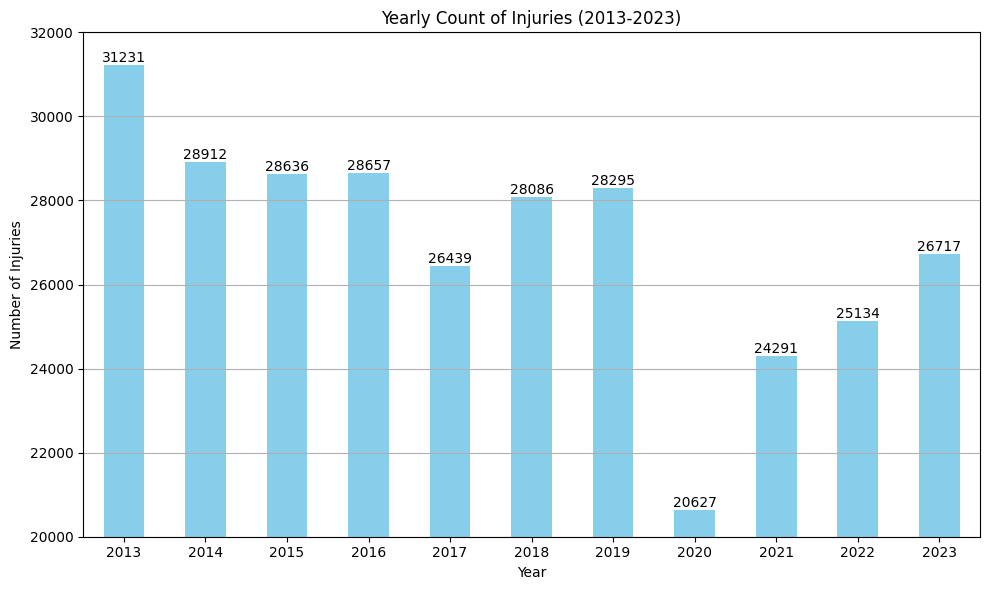

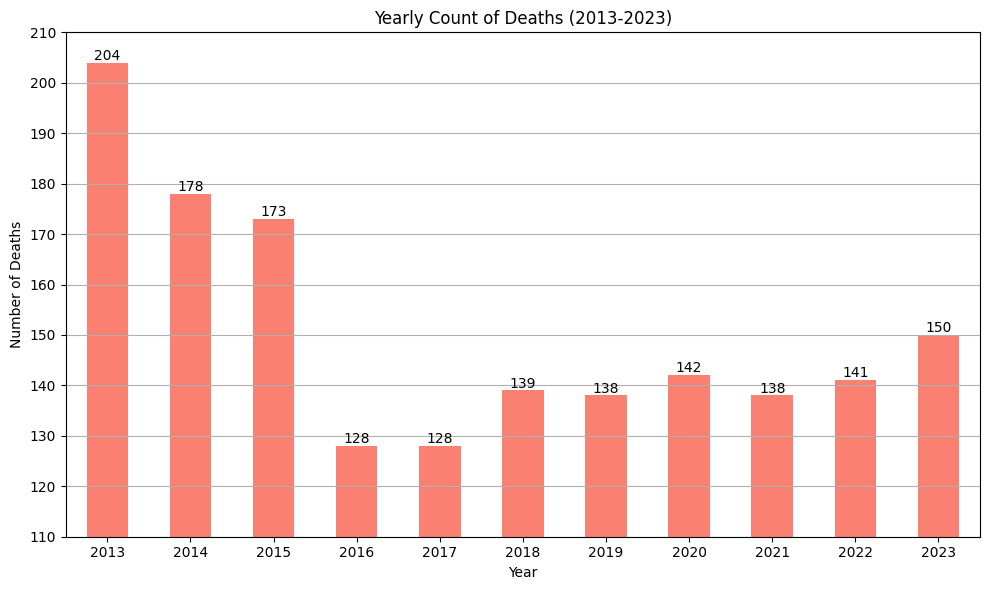

In [98]:
# First, filter the dataset to include only the years 2013 to 2023
filtered_data = nyc_data[(nyc_data['CRASH DATE'].dt.year >= 2013) & (nyc_data['CRASH DATE'].dt.year <= 2023)]

# Group the filtered data by year and count the number of injuries and deaths for each year
injuries_by_year = filtered_data.groupby(filtered_data['CRASH DATE'].dt.year)['injured_flag'].sum()
deaths_by_year = filtered_data.groupby(filtered_data['CRASH DATE'].dt.year)['killed_flag'].sum()

# Plotting injuries
plt.figure(figsize=(10, 6))
bars = injuries_by_year.plot(kind='bar', color='skyblue')
plt.title('Yearly Count of Injuries (2013-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Setting y-axis range and grid lines for injuries
plt.ylim(20000, 32000)
plt.yticks(range(20000, 32001, 2000))

# Adding numbers inside the bars
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'),
                 (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()), ha='center', va='center',
                 xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

# Plotting deaths
plt.figure(figsize=(10, 6))
bars = deaths_by_year.plot(kind='bar', color='salmon')
plt.title('Yearly Count of Deaths (2013-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Setting y-axis range and grid lines for deaths
plt.ylim(110, 210)
plt.yticks(range(110, 211, 10))

# Adding numbers inside the bars
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'),
                 (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()), ha='center', va='center',
                 xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

/tmp/ipython-input-2923624137.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



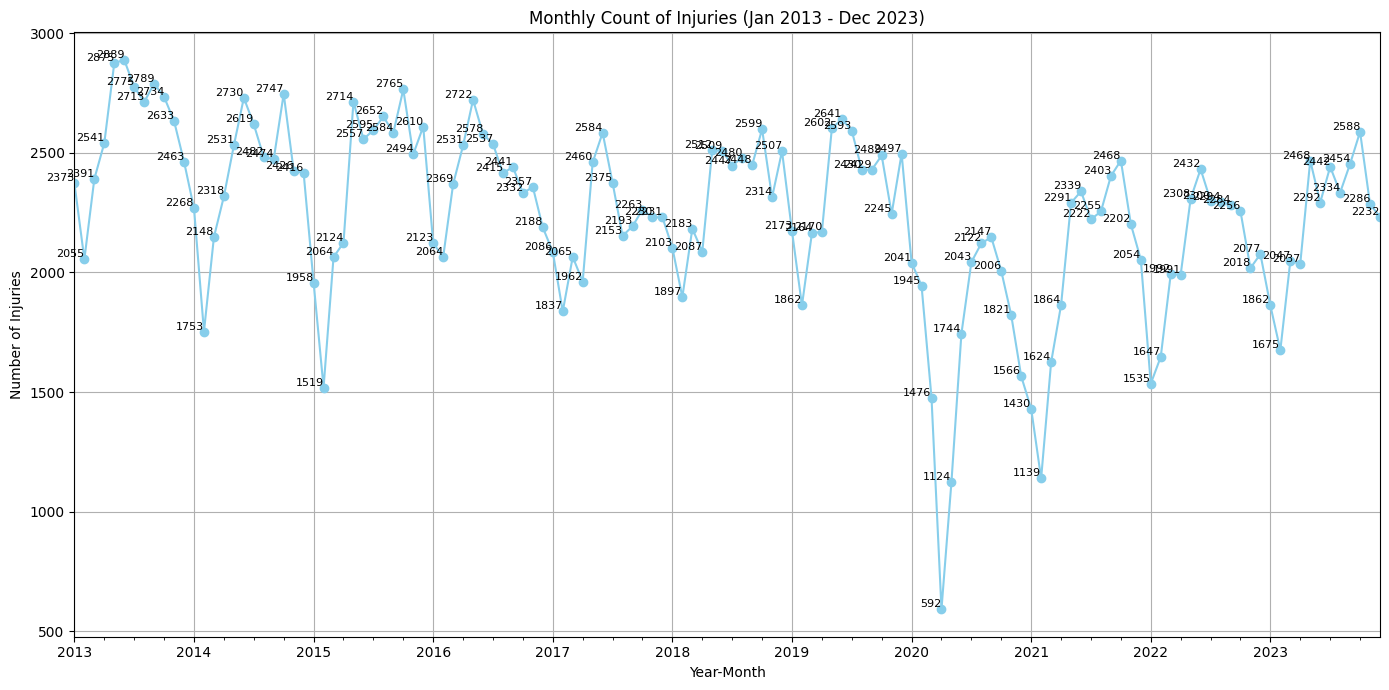

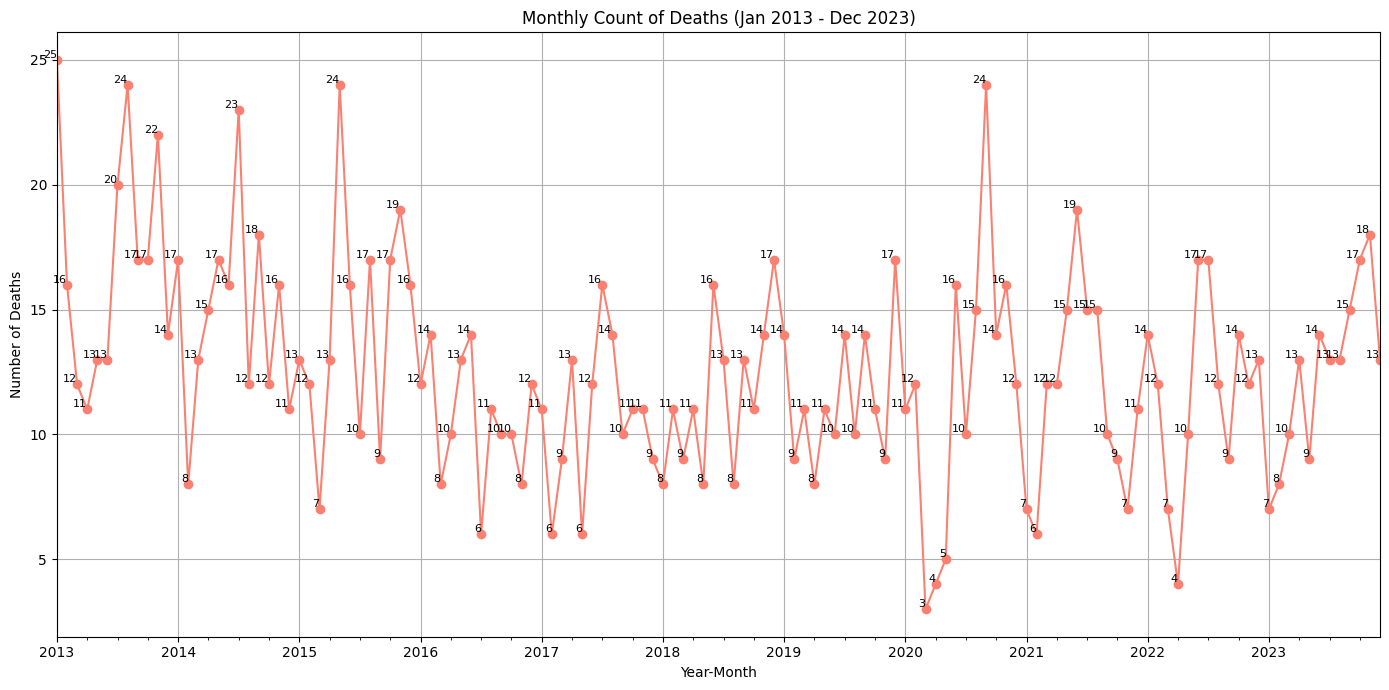

In [99]:
# First, filter the dataset to include only the years 2013 to 2023
filtered_data = nyc_data[(nyc_data['CRASH DATE'].dt.year >= 2013) & (nyc_data['CRASH DATE'].dt.year <= 2023)]

# Create a new column for year-month
filtered_data['YearMonth'] = filtered_data['CRASH DATE'].dt.to_period('M')

# Group the filtered data by YearMonth and sum the number of injuries and deaths for each month
monthly_injuries = filtered_data.groupby('YearMonth')['injured_flag'].sum()
monthly_deaths = filtered_data.groupby('YearMonth')['killed_flag'].sum()

# Plotting monthly injuries
plt.figure(figsize=(14, 7))
monthly_injuries.plot(kind='line', color='skyblue', marker='o')
plt.title('Monthly Count of Injuries (Jan 2013 - Dec 2023)')
plt.xlabel('Year-Month')
plt.ylabel('Number of Injuries')
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()

# Adding numbers on the line chart for injuries
for i, value in enumerate(monthly_injuries):
    plt.text(monthly_injuries.index[i].to_timestamp(), value, f'{value:.0f}', ha='right', va='bottom', fontsize=8)

plt.show()

# Plotting monthly deaths
plt.figure(figsize=(14, 7))
monthly_deaths.plot(kind='line', color='salmon', marker='o')
plt.title('Monthly Count of Deaths (Jan 2013 - Dec 2023)')
plt.xlabel('Year-Month')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()

# Adding numbers on the line chart for deaths
for i, value in enumerate(monthly_deaths):
    plt.text(monthly_deaths.index[i].to_timestamp(), value, f'{value:.0f}', ha='right', va='bottom', fontsize=8)

plt.show()

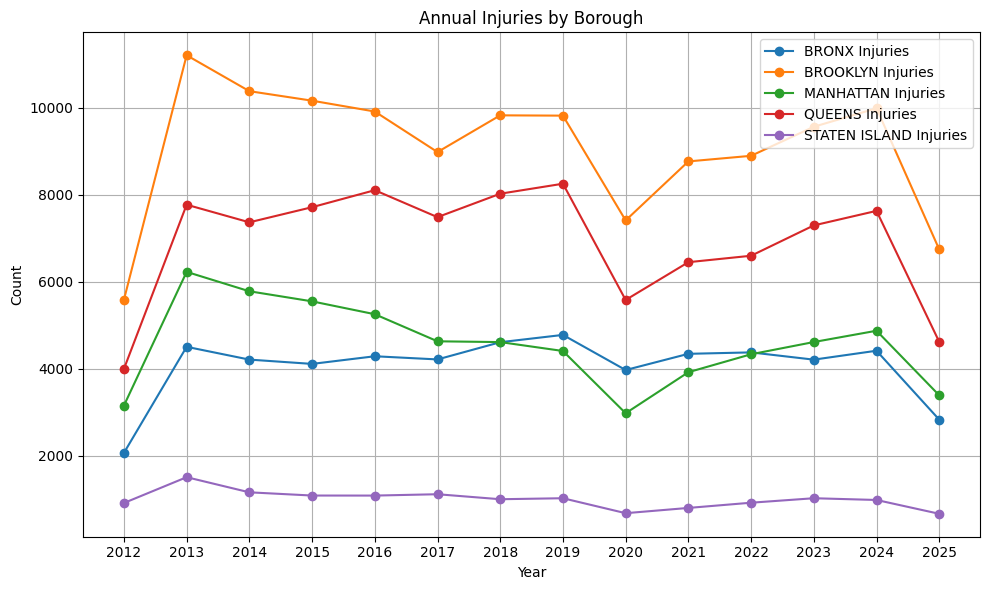

In [100]:
# Group data by Year and Borough and calculate sums
grouped_data = nyc_data.groupby(['Year', 'BOROUGH']).agg({'injured_flag': 'sum', 'killed_flag': 'sum'}).reset_index()

# Plot line chart
plt.figure(figsize=(10, 6))

# Iterate over unique boroughs
for borough in grouped_data['BOROUGH'].unique():
    borough_data = grouped_data[grouped_data['BOROUGH'] == borough]
    plt.plot(borough_data['Year'], borough_data['injured_flag'], label=f'{borough} Injuries', marker='o')

plt.title('Annual Injuries by Borough')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.xticks(grouped_data['Year'].unique())  # Set x-axis ticks to years
plt.tight_layout()
plt.show()

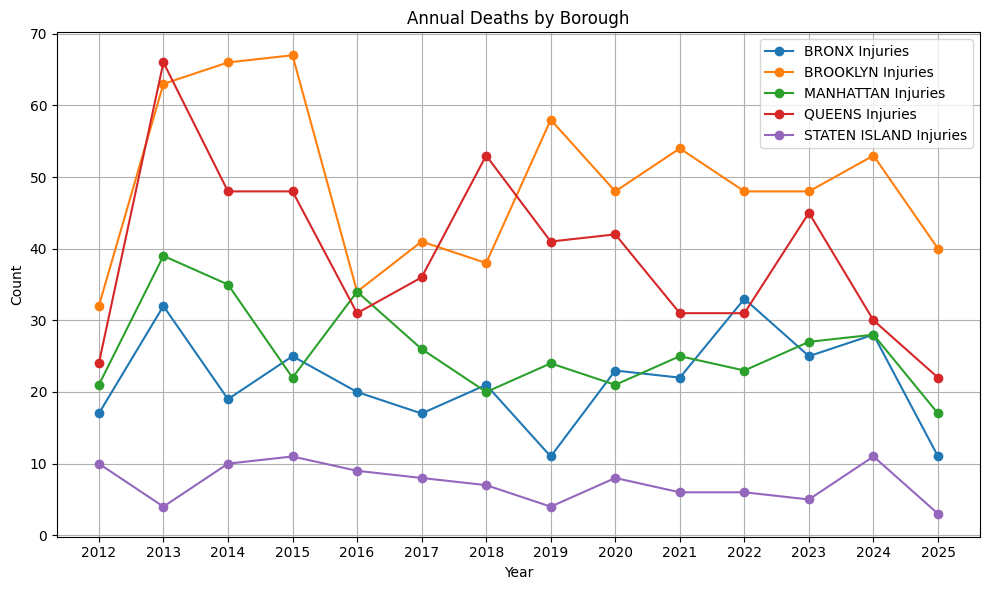

In [101]:
# Group data by Year and Borough and calculate sums
grouped_data = nyc_data.groupby(['Year', 'BOROUGH']).agg({'injured_flag': 'sum', 'killed_flag': 'sum'}).reset_index()

# Plot line chart
plt.figure(figsize=(10, 6))

# Iterate over unique boroughs
for borough in grouped_data['BOROUGH'].unique():
    borough_data = grouped_data[grouped_data['BOROUGH'] == borough]
    plt.plot(borough_data['Year'], borough_data['killed_flag'], label=f'{borough} Injuries', marker='o')

plt.title('Annual Deaths by Borough')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.xticks(grouped_data['Year'].unique())  # Set x-axis ticks to years
plt.tight_layout()
plt.show()

In [102]:
# Filter data for killed_flag and injured_flag
killed_data = nyc_data[nyc_data['killed_flag'] == 1]
injured_data = nyc_data[nyc_data['injured_flag'] == 1]

# Group the data by day of the week and hour
grouped_killed = killed_data.groupby(['day_of_week', 'hour']).size().reset_index(name='count')
grouped_injured = injured_data.groupby(['day_of_week', 'hour']).size().reset_index(name='count')

# Create the treemap for killed_flag
fig_killed = px.treemap(grouped_killed,
                        path=['day_of_week', 'hour'],
                        values='count',
                        color='count',
                        color_continuous_scale='Reds',
                        title='Treemap of Collisions Resulting in Death by Day of Week and Hour')

fig_killed.update_layout(margin=dict(t=50, l=25, r=25, b=25))

# Create the treemap for injured_flag
fig_injured = px.treemap(grouped_injured,
                         path=['day_of_week', 'hour'],
                         values='count',
                         color='count',
                         color_continuous_scale='Blues',
                         title='Treemap of Collisions Resulting in Injury by Day of Week and Hour')

fig_injured.update_layout(margin=dict(t=50, l=25, r=25, b=25))

# Show the treemaps
fig_killed.show()
fig_injured.show()

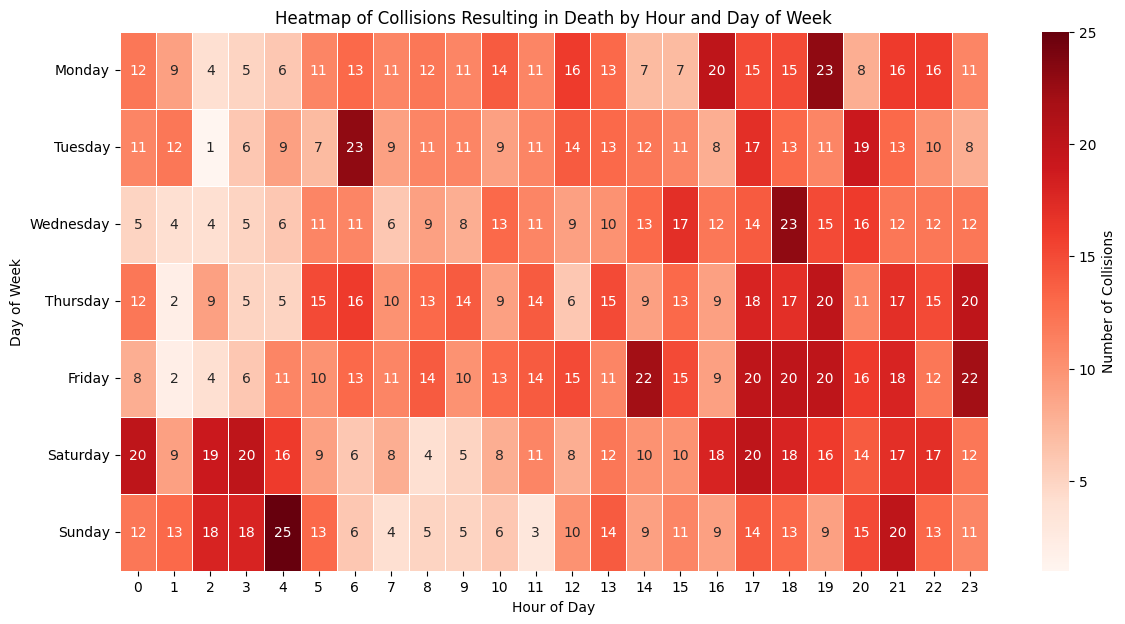

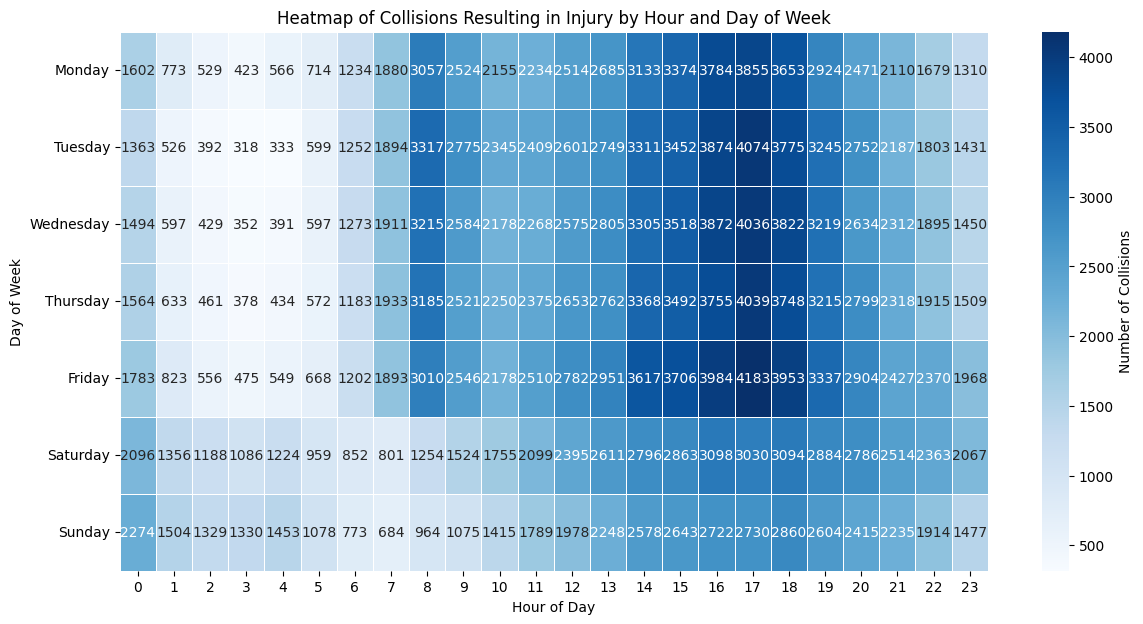

In [103]:
# Order days of the week for consistent plotting
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hours = range(24)

# Create pivot tables for killed_flag and injured_flag, and reindex them
killed_pivot = nyc_data[nyc_data['killed_flag'] == 1].pivot_table(
    index='hour', columns='day_of_week', values='COLLISION_ID', aggfunc='count', fill_value=0
).reindex(index=hours, columns=days_order, fill_value=0)

injured_pivot = nyc_data[nyc_data['injured_flag'] == 1].pivot_table(
    index='hour', columns='day_of_week', values='COLLISION_ID', aggfunc='count', fill_value=0
).reindex(index=hours, columns=days_order, fill_value=0)

# Plot the heatmap for killed_flag
plt.figure(figsize=(14, 7))
ax1 = sns.heatmap(killed_pivot.T, cmap='Reds', annot=True, fmt='d', linewidths=.5, cbar_kws={'label': 'Number of Collisions'})
ax1.set_title('Heatmap of Collisions Resulting in Death by Hour and Day of Week')
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Day of Week')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0)
plt.show()

# Plot the heatmap for injured_flag
plt.figure(figsize=(14, 7))
ax2 = sns.heatmap(injured_pivot.T, cmap='Blues', annot=True, fmt='d', linewidths=.5, cbar_kws={'label': 'Number of Collisions'})
ax2.set_title('Heatmap of Collisions Resulting in Injury by Hour and Day of Week')
ax2.set_xlabel('Hour of Day')
ax2.set_ylabel('Day of Week')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0)
plt.show()

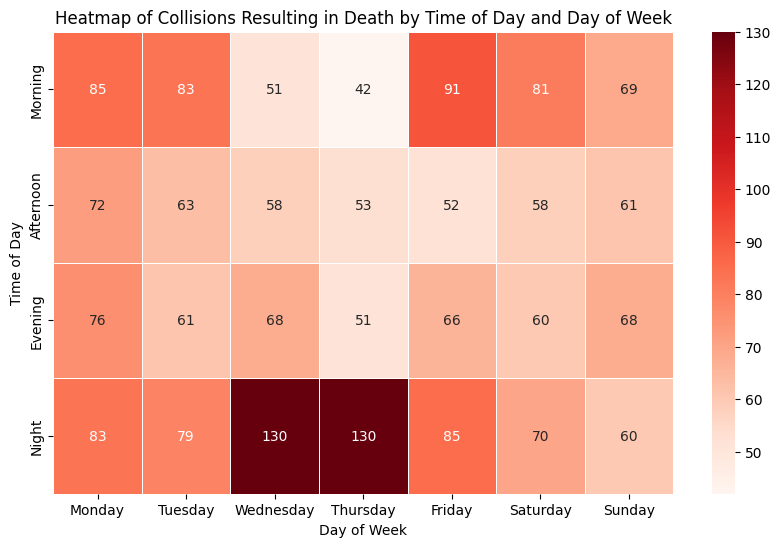

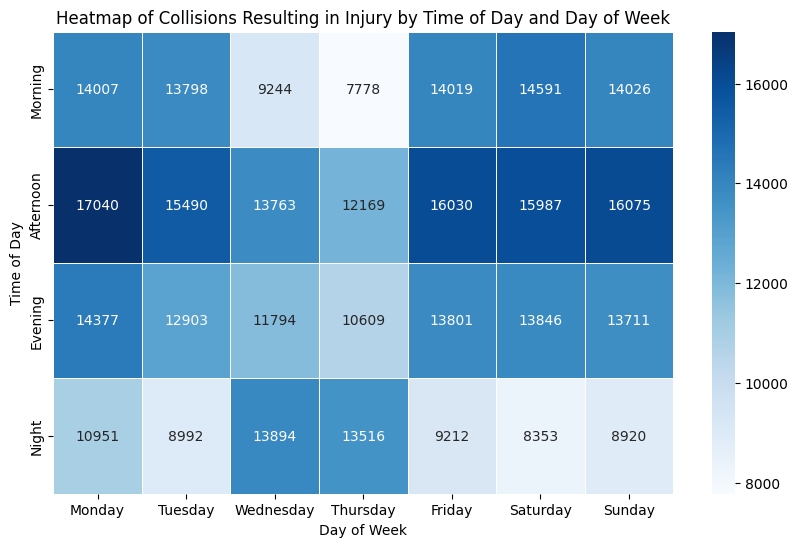

In [104]:
# Pivot the DataFrame based on 'time_category' and 'day_of_week', and aggregate counts of 'killed_flag' and 'injured_flag'
heatmap_data_killed = nyc_data.pivot_table(index='time_category', columns='day_of_week', values='killed_flag', aggfunc='sum', fill_value=0)
heatmap_data_injured = nyc_data.pivot_table(index='time_category', columns='day_of_week', values='injured_flag', aggfunc='sum', fill_value=0)

# Reorder the rows based on the time categories
time_category_order = ['Morning', 'Afternoon', 'Evening', 'Night']
heatmap_data_killed = heatmap_data_killed.reindex(time_category_order)
heatmap_data_injured = heatmap_data_injured.reindex(time_category_order)

# Order days of the week for consistent plotting
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot the heatmap for killed_flag
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_killed, cmap='Reds', annot=True, fmt='d', linewidths=.5, xticklabels=days_order)
plt.title('Heatmap of Collisions Resulting in Death by Time of Day and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Time of Day')
plt.show()

# Plot the heatmap for injured_flag
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_injured, cmap='Blues', annot=True, fmt='d', linewidths=.5, xticklabels=days_order)
plt.title('Heatmap of Collisions Resulting in Injury by Time of Day and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Time of Day')
plt.show()

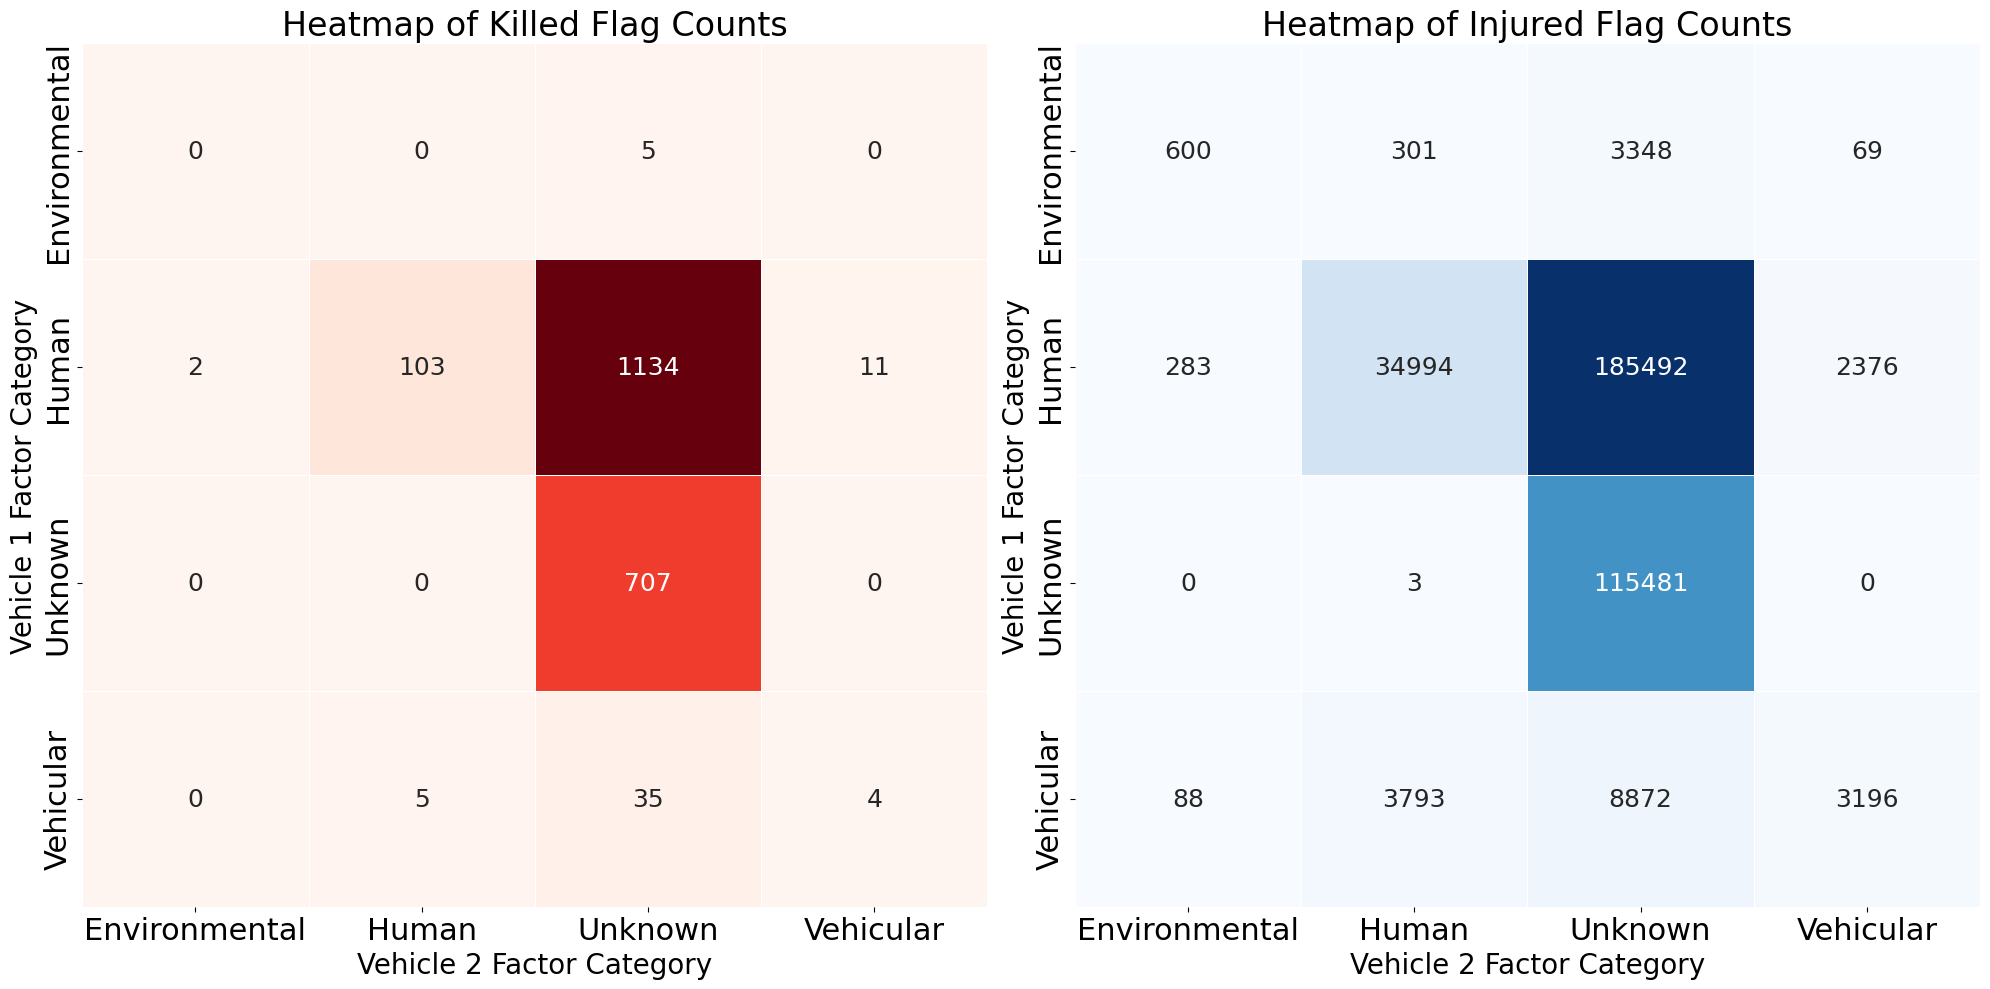

In [105]:
# Create pivot tables for killed_flag and injured_flag
killed_pivot = nyc_data.pivot_table(
    index='FACTOR VEHICLE 1 CATEGORY',
    columns='FACTOR VEHICLE 2 CATEGORY',
    values='killed_flag',
    aggfunc='sum',
    fill_value=0
)

injured_pivot = nyc_data.pivot_table(
    index='FACTOR VEHICLE 1 CATEGORY',
    columns='FACTOR VEHICLE 2 CATEGORY',
    values='injured_flag',
    aggfunc='sum',
    fill_value=0
)

# Plotting the heatmaps with adjusted font size and grid size
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

sns.heatmap(killed_pivot, ax=axes[0], annot=True, fmt="d", cmap="Reds", cbar=False, annot_kws={"size": 18}, linewidths=.5)
axes[0].set_title('Heatmap of Killed Flag Counts', fontsize=24)
axes[0].set_xlabel('Vehicle 2 Factor Category', fontsize=20)
axes[0].set_ylabel('Vehicle 1 Factor Category', fontsize=20)
axes[0].tick_params(axis='both', which='major', labelsize=22)

sns.heatmap(injured_pivot, ax=axes[1], annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 18}, linewidths=.5)
axes[1].set_title('Heatmap of Injured Flag Counts', fontsize=24)
axes[1].set_xlabel('Vehicle 2 Factor Category', fontsize=20)
axes[1].set_ylabel('Vehicle 1 Factor Category', fontsize=20)
axes[1].tick_params(axis='both', which='major', labelsize=22)

plt.tight_layout()
plt.show()

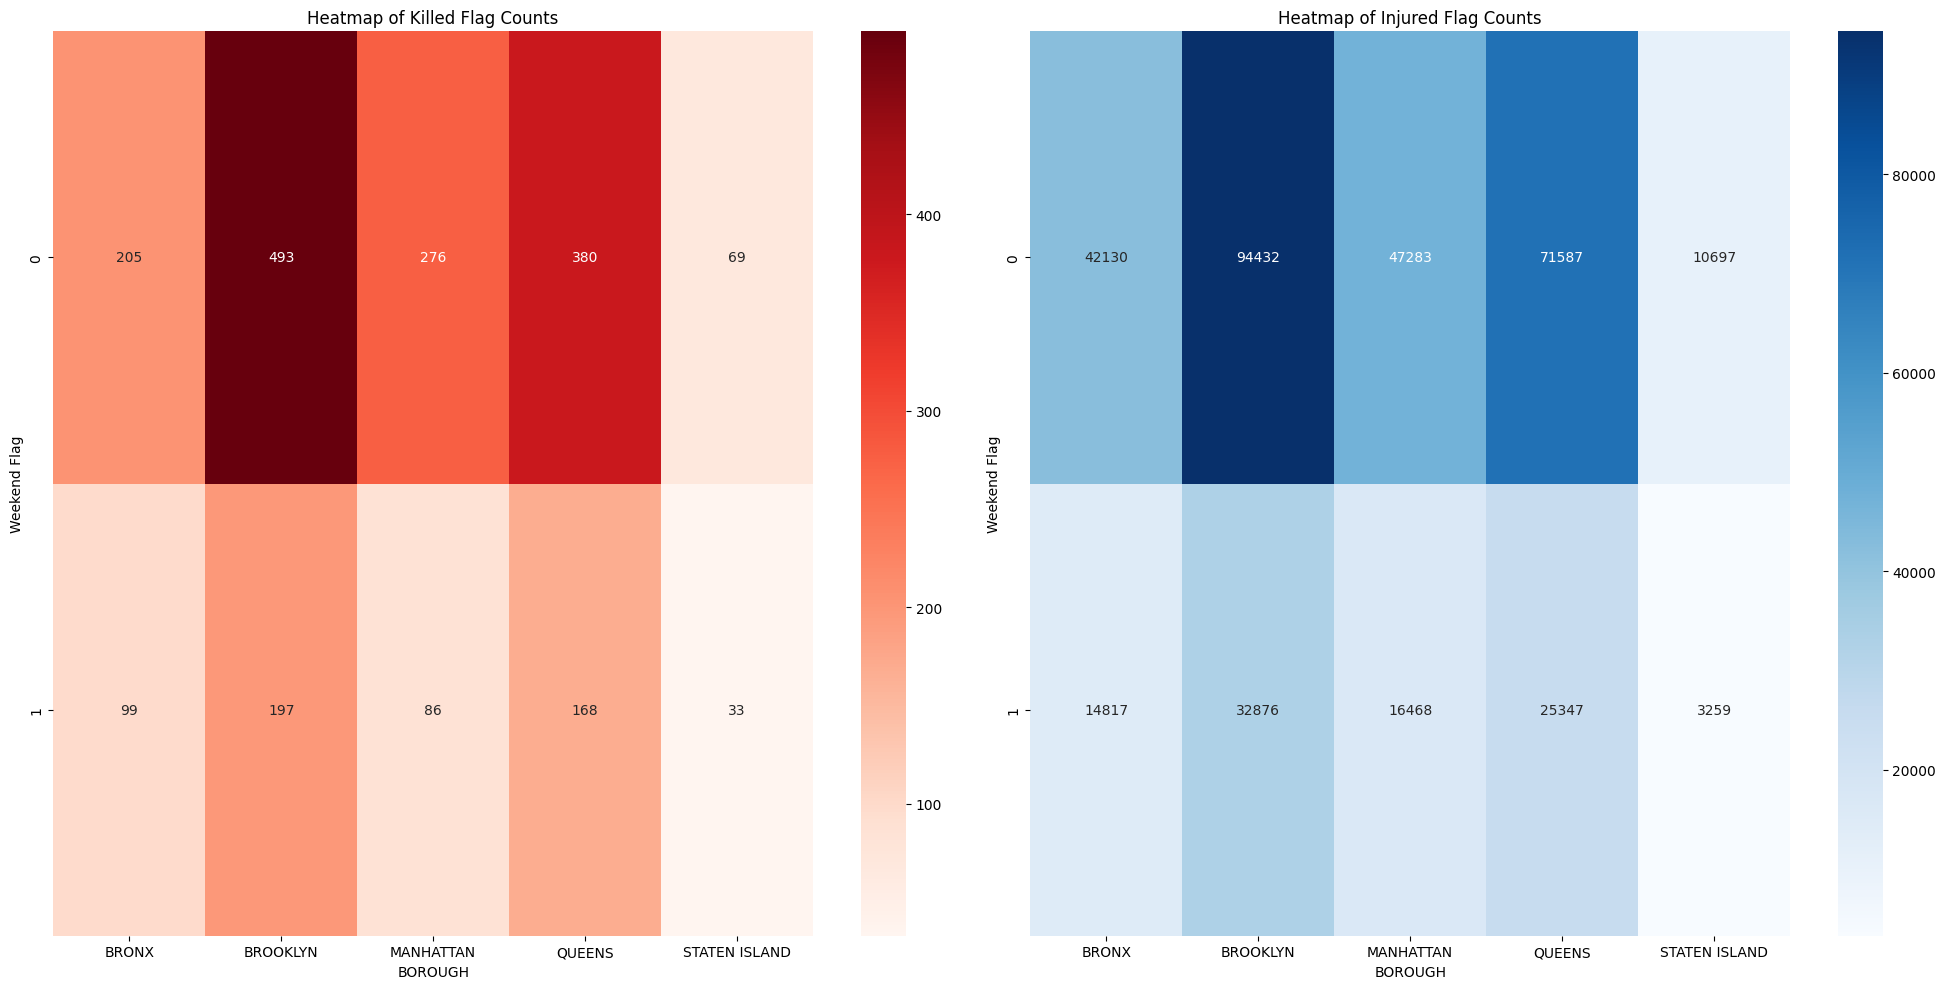

In [106]:
# Pivot table for killed_flag
killed_pivot = nyc_data.pivot_table(
    index='weekend',
    columns='BOROUGH',
    values='killed_flag',
    aggfunc='sum',
    fill_value=0
)

# Pivot table for injured_flag
injured_pivot = nyc_data.pivot_table(
    index='weekend',
    columns='BOROUGH',
    values='injured_flag',
    aggfunc='sum',
    fill_value=0
)

# Plotting the heatmaps
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

sns.heatmap(killed_pivot, ax=axes[0], annot=True, fmt="d", cmap="Reds")
axes[0].set_title('Heatmap of Killed Flag Counts')
axes[0].set_xlabel('BOROUGH')
axes[0].set_ylabel('Weekend Flag')

sns.heatmap(injured_pivot, ax=axes[1], annot=True, fmt="d", cmap="Blues")
axes[1].set_title('Heatmap of Injured Flag Counts')
axes[1].set_xlabel('BOROUGH')
axes[1].set_ylabel('Weekend Flag')

plt.tight_layout()
plt.show()

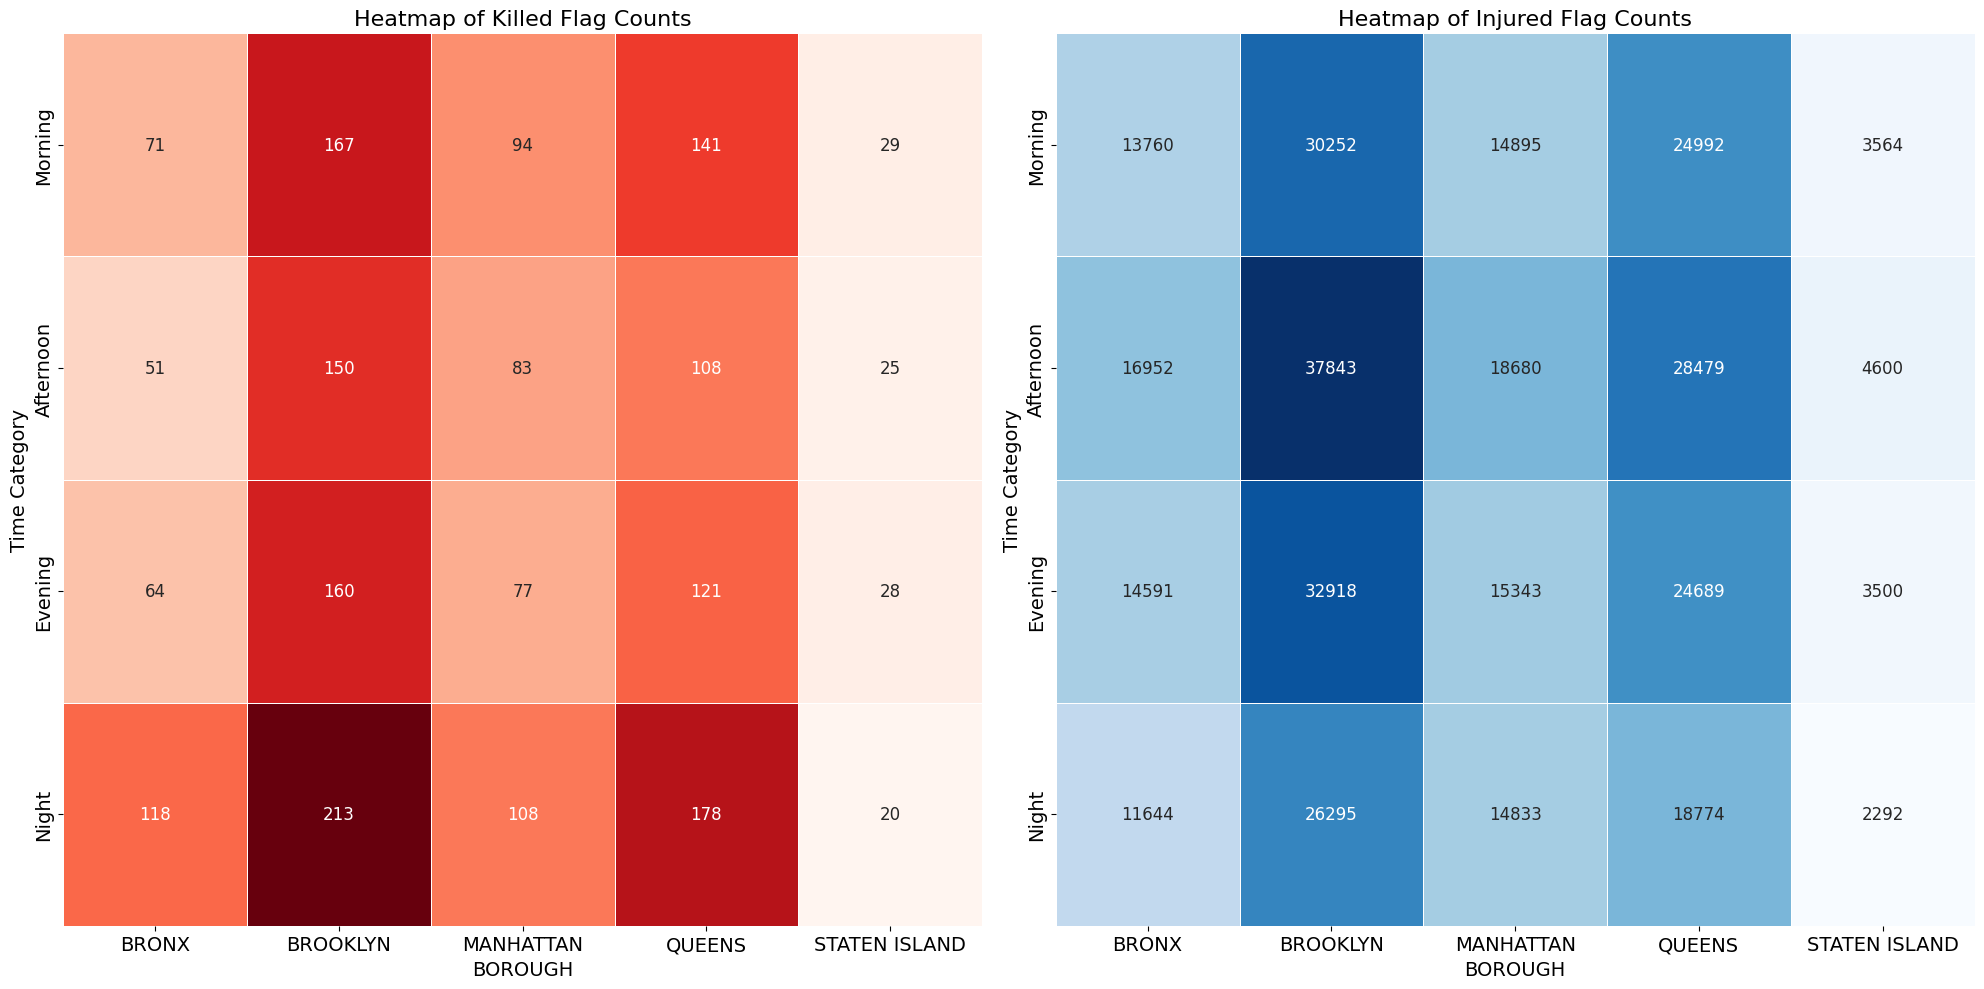

In [107]:
# Create pivot tables for killed_flag and injured_flag
killed_pivot = nyc_data.pivot_table(
    index='time_category',
    columns='BOROUGH',
    values='killed_flag',
    aggfunc='sum',
    fill_value=0
)

injured_pivot = nyc_data.pivot_table(
    index='time_category',
    columns='BOROUGH',
    values='injured_flag',
    aggfunc='sum',
    fill_value=0
)

# Reorder the rows based on the time categories
time_category_order = ['Morning', 'Afternoon', 'Evening', 'Night']
killed_pivot = killed_pivot.reindex(time_category_order)
injured_pivot = injured_pivot.reindex(time_category_order)

# Plotting the heatmaps with adjusted font size and grid size
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

sns.heatmap(killed_pivot, ax=axes[0], annot=True, fmt="d", cmap="Reds", cbar=False, annot_kws={"size": 12}, linewidths=.5)
axes[0].set_title('Heatmap of Killed Flag Counts', fontsize=16)
axes[0].set_xlabel('BOROUGH', fontsize=14)
axes[0].set_ylabel('Time Category', fontsize=14)
axes[0].tick_params(axis='both', which='major', labelsize=14)

sns.heatmap(injured_pivot, ax=axes[1], annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 12}, linewidths=.5)
axes[1].set_title('Heatmap of Injured Flag Counts', fontsize=16)
axes[1].set_xlabel('BOROUGH', fontsize=14)
axes[1].set_ylabel('Time Category', fontsize=14)
axes[1].tick_params(axis='both', which='major', labelsize=14)

plt.tight_layout()
plt.show()

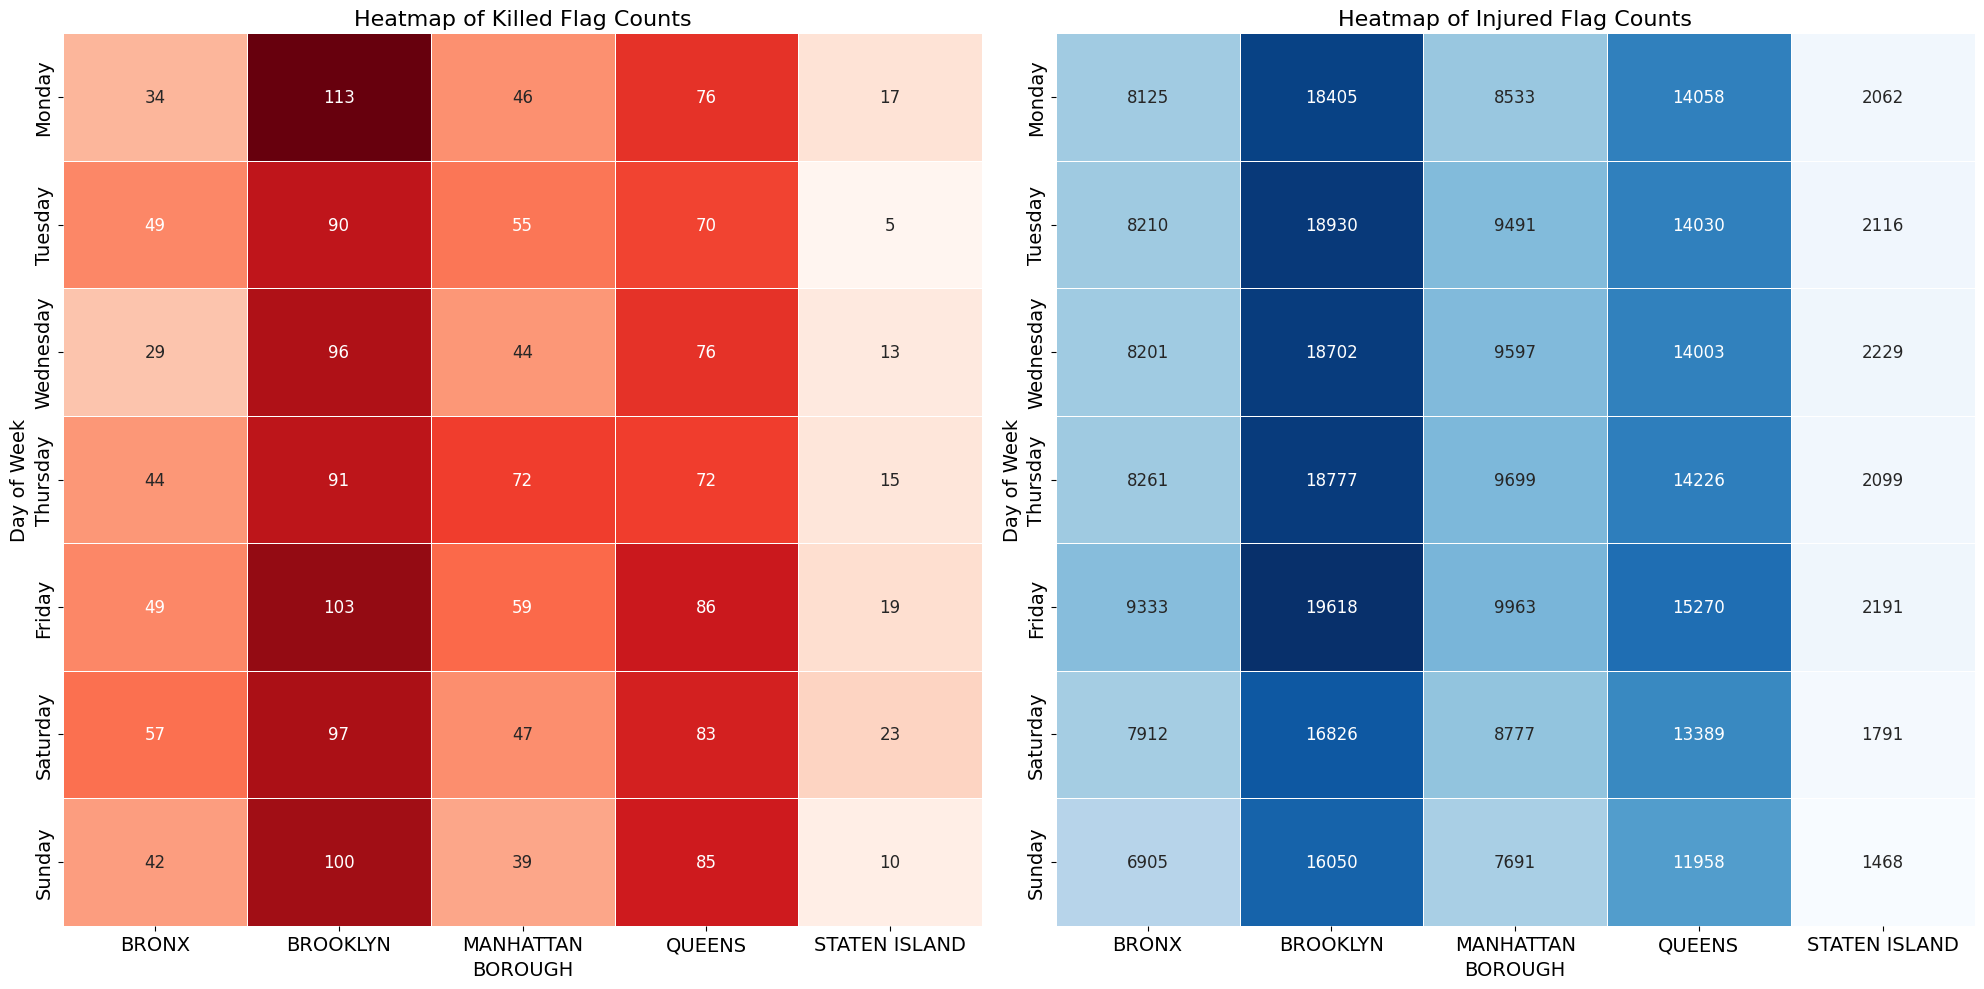

In [108]:
# Create pivot tables for killed_flag and injured_flag
killed_pivot = nyc_data.pivot_table(
    index='day_of_week',
    columns='BOROUGH',
    values='killed_flag',
    aggfunc='sum',
    fill_value=0
)

injured_pivot = nyc_data.pivot_table(
    index='day_of_week',
    columns='BOROUGH',
    values='injured_flag',
    aggfunc='sum',
    fill_value=0
)

# Reorder the rows based on the days of the week
day_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
killed_pivot = killed_pivot.reindex(day_of_week_order)
injured_pivot = injured_pivot.reindex(day_of_week_order)

# Plotting the heatmaps with adjusted font size and grid size
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

sns.heatmap(killed_pivot, ax=axes[0], annot=True, fmt="d", cmap="Reds", cbar=False, annot_kws={"size": 12}, linewidths=.5)
axes[0].set_title('Heatmap of Killed Flag Counts', fontsize=16)
axes[0].set_xlabel('BOROUGH', fontsize=14)
axes[0].set_ylabel('Day of Week', fontsize=14)
axes[0].tick_params(axis='both', which='major', labelsize=14)

sns.heatmap(injured_pivot, ax=axes[1], annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 12}, linewidths=.5)
axes[1].set_title('Heatmap of Injured Flag Counts', fontsize=16)
axes[1].set_xlabel('BOROUGH', fontsize=14)
axes[1].set_ylabel('Day of Week', fontsize=14)
axes[1].tick_params(axis='both', which='major', labelsize=14)

plt.tight_layout()
plt.show()

## Analyzing dependent and independent variables

In [109]:
# Calculate total record count
total_count = len(nyc_data)

# Calculate the injured count and percent
injured_event_count = len(nyc_data[nyc_data['injured_flag'] == 1])
injured_event_percent = len(nyc_data[nyc_data['injured_flag'] == 1])*100/len(nyc_data)

# Calculate the killed count and percent
killed_event_count = len(nyc_data[nyc_data['killed_flag'] == 1])
killed_event_percent = len(nyc_data[nyc_data['killed_flag'] == 1])*100/len(nyc_data)

# Combine the results into a single DataFrame
summary_table = pd.DataFrame({
    'Total Count': [total_count],
    'Injured Count': [injured_event_count],
    'Injured Percent': [injured_event_percent],
    'Killed Count': [killed_event_count],
    'Killed Percent': [killed_event_percent]
})
summary_table

,Total Count,Injured Count,Injured Percent,Killed Count,Killed Percent
0,1524803,358896,23.537204,2006,0.131558


In [110]:
# Group by 'time_category'
grouped_data = nyc_data.groupby('time_category')

# Calculate total record count
total_count = grouped_data['COLLISION_ID'].count()

# Calculate the injured count and percent for each time category
injured_event_counts = grouped_data['injured_flag'].sum()
injured_event_percentages = injured_event_counts * 100 / total_count

# Calculate the killed count and percent for each time category
killed_event_counts = grouped_data['killed_flag'].sum()
killed_event_percentages = killed_event_counts * 100 / total_count

# Combine the results into a single DataFrame
summary_table = pd.DataFrame({
    'Time Category': grouped_data.groups.keys(),
    'Total Count': total_count,
    'Injured Count': injured_event_counts,
    'Injured Percent': injured_event_percentages,
    'Killed Count': killed_event_counts,
    'Killed Percent': killed_event_percentages
})

summary_table.reset_index(drop=True, inplace=True)  # Reset index for better visualization
summary_table

,Time Category,Total Count,Injured Count,Injured Percent,Killed Count,Killed Percent
0,Afternoon,482986,106554,22.061509,417,0.086338
1,Evening,345784,91041,26.328864,450,0.130139
2,Morning,418241,87463,20.912106,502,0.120026
3,Night,277792,73838,26.580319,637,0.229308


In [111]:
grouped_counts = nyc_data.groupby(['killed_flag', 'injured_flag']).size().reset_index(name='count')

# Print the grouped counts
print(grouped_counts)

   killed_flag  injured_flag    count
0            0             0  1164361
1            0             1   358436
2            1             0     1546
3            1             1      460


In [112]:
# Create the any_Casualty field
nyc_data['any_casualty_flag'] = ((nyc_data['killed_flag'] == 1) | (nyc_data['injured_flag'] == 1)).astype(int)


In [113]:
grouped_counts = nyc_data.groupby(['killed_flag', 'injured_flag','any_casualty_flag']).size().reset_index(name='count')

# Print the grouped counts
print(grouped_counts)

   killed_flag  injured_flag  any_casualty_flag    count
0            0             0                  0  1164361
1            0             1                  1   358436
2            1             0                  1     1546
3            1             1                  1      460


# Data Prep for Logistic Regression Model

In [114]:
nyc_data.head()

,COLLISION_ID,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LOCATION,injured_flag,killed_flag,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,...,hour,time_category,weekend,FACTOR VEHICLE 1 CATEGORY,FACTOR VEHICLE 2 CATEGORY,COMBINED FACTOR CATEGORY,any_factor_Environmental,any_factor_Human,any_factor_Vehicular,any_casualty_flag
2,4675373,2023-11-01,1900-01-01 01:29:00,BROOKLYN,11230.0,"(40.62179, -73.970024)",1,0,unspecified,unspecified,...,1,Night,0,Unknown,Unknown,"Unknown, Unknown",0,0,0,1
9,4456314,2021-09-11,1900-01-01 09:35:00,BROOKLYN,11208.0,"(40.667202, -73.8665)",0,0,unspecified,unspecified,...,9,Morning,1,Unknown,Unknown,"Unknown, Unknown",0,0,0,0
10,4486609,2021-12-14,1900-01-01 08:13:00,BROOKLYN,11233.0,"(40.683304, -73.917274)",0,0,unspecified,unspecified,...,8,Morning,0,Unknown,Unknown,"Unknown, Unknown",0,0,0,0
13,4486660,2021-12-14,1900-01-01 08:17:00,BRONX,10475.0,"(40.86816, -73.83148)",1,0,unspecified,unspecified,...,8,Morning,0,Unknown,Unknown,"Unknown, Unknown",0,0,0,1
14,4487074,2021-12-14,1900-01-01 21:10:00,BROOKLYN,11207.0,"(40.67172, -73.8971)",0,0,driver inexperience,unspecified,...,21,Night,0,Human,Unknown,"Human, Unknown",0,1,0,0


In [115]:
nyc_data['CRASH DATE'].min()

Timestamp('2012-07-01 00:00:00')

In [116]:
nyc_data['CRASH DATE'].max()

Timestamp('2025-08-25 00:00:00')

In [117]:
# Create dummy variables
dummies_borough = pd.get_dummies(nyc_data['BOROUGH'], prefix='BOROUGH')
dummies_factor1 = pd.get_dummies(nyc_data['CONTRIBUTING FACTOR VEHICLE 1'], prefix='FACTOR1')
dummies_factor2 = pd.get_dummies(nyc_data['CONTRIBUTING FACTOR VEHICLE 2'], prefix='FACTOR2')
dummies_day_of_week = pd.get_dummies(nyc_data['day_of_week'], prefix='DAY')
dummies_time_category = pd.get_dummies(nyc_data['time_category'], prefix='TIME')
dummies_factor_cat1 = pd.get_dummies(nyc_data['FACTOR VEHICLE 1 CATEGORY'], prefix='FACTORCAT1')
dummies_factor_cat2 = pd.get_dummies(nyc_data['FACTOR VEHICLE 2 CATEGORY'], prefix='FACTORCAT2')
dummies_year = pd.get_dummies(nyc_data['Year'], prefix='YEAR')
dummies_month = pd.get_dummies(nyc_data['Month'], prefix='Month')

# Combine the dummy variables with the original DataFrame
nyc_data_with_dummies = pd.concat([nyc_data, dummies_borough, dummies_factor1, dummies_factor2, dummies_day_of_week, dummies_time_category, dummies_factor_cat1, dummies_factor_cat2, dummies_year, dummies_month], axis=1)

# Drop the original categorical columns
nyc_data_with_dummies.drop(['BOROUGH','CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2','day_of_week','time_category','FACTOR VEHICLE 1 CATEGORY','FACTOR VEHICLE 2 CATEGORY', 'Year', 'Month'], axis=1, inplace=True)

# Optionally, drop one of the dummy variables for each factor to avoid multicollinearity (dummy variable trap)
nyc_data_with_dummies.drop(['BOROUGH_BRONX','FACTOR1_accelerator defective', 'FACTOR2_accelerator defective','DAY_Monday','TIME_Morning', 'FACTORCAT1_Unknown','FACTORCAT2_Unknown', 'YEAR_2012', 'Month_1'], axis=1, inplace=True)

nyc_data_with_dummies.dtypes

,0
COLLISION_ID,int64
CRASH DATE,datetime64[ns]
CRASH TIME,datetime64[ns]
ZIP CODE,object
LOCATION,object
injured_flag,int64
killed_flag,int64
VEHICLE TYPE CODE 1,object
VEHICLE TYPE CODE 2,object
CRASH DATETIME,datetime64[ns]


## Isolate X & Y

In [118]:
Y = nyc_data_with_dummies.loc[:,'any_casualty_flag'].values

In [119]:
#First Model using Weekday columns
X = nyc_data_with_dummies.loc[:,['DAY_Friday','DAY_Saturday', 'DAY_Sunday','DAY_Thursday','DAY_Tuesday','DAY_Wednesday']].values

# Convert boolean columns to integers using NumPy operations
X = X.astype(int)  # Assuming all values are already boolean or integer

# Add a constant column for the intercept term
X = sm.add_constant(X)

#Run Logistic Regression model
model_weekday = sm.Logit(Y, X).fit()

#Model Summary Output
model_weekday.summary(yname='any_casualty_flag',
              xname=('constant','DAY_Friday','DAY_Saturday', 'DAY_Sunday','DAY_Thursday','DAY_Tuesday','DAY_Wednesday'),
              title = 'Impact of Weekday on Casualty - model Weekday')

Optimization terminated successfully.
         Current function value: 0.546864
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                Impact of Weekday on Casualty - model Weekday                 
==============================================================================
Dep. Variable:      any_casualty_flag   No. Observations:              1524803
Model:                          Logit   Df Residuals:                  1524796
Method:                           MLE   Df Model:                            6
Date:                Fri, 29 Aug 2025   Pseudo R-squ.:               2.634e-05
Time:                        18:33:33   Log-Likelihood:            -8.3386e+05
converged:                       True   LL-Null:                   -8.3388e+05
Covariance Type:            nonrobust   LLR p-value:                 7.642e-08
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
constant         -1.1813      0.005   -234.275      0.000      -1.191      -1.171
DAY_Friday       -0.0062      0.007     -0.896      0.370      -0.020       0.007
DAY_Saturday      0.0128      0.007      1.764      0.078      -0.001       0.027
DAY_Sunday        0.0364      0.007      4.899      0.000       0.022       0.051
DAY_Thursday      0.0009      0.007      0.128      0.898      -0.013       0.015
DAY_Tuesday       0.0071      0.007      0.996      0.319      -0.007       0.021
DAY_Wednesday     0.0164      0.007      2.315      0.021       0.003       0.030
=================================================================================
"""

In [120]:
#Second Model using Time Category columns
X = nyc_data_with_dummies.loc[:,['TIME_Afternoon','TIME_Evening','TIME_Night']].values

# Convert boolean columns to integers using NumPy operations
X = X.astype(int)  # Assuming all values are already boolean or integer

# Add a constant column for the intercept term
X = sm.add_constant(X)

#Run Logistic Regression model
model_time_cat = sm.Logit(Y, X).fit()

#Model Summary Output
model_time_cat.summary(yname='any_casualty_flag',
              xname=('constant','TIME_Afternoon','TIME_Evening','TIME_Night'),
              title = 'Model Time Category')

Optimization terminated successfully.
         Current function value: 0.545183
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                             Model Time Category                              
==============================================================================
Dep. Variable:      any_casualty_flag   No. Observations:              1524803
Model:                          Logit   Df Residuals:                  1524799
Method:                           MLE   Df Model:                            3
Date:                Fri, 29 Aug 2025   Pseudo R-squ.:                0.003100
Time:                        18:33:40   Log-Likelihood:            -8.3130e+05
converged:                       True   LL-Null:                   -8.3388e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
constant          -1.3244      0.004   -348.919      0.000      -1.332      -1.317
TIME_Afternoon     0.0662      0.005     12.877      0.000       0.056       0.076
TIME_Evening       0.3005      0.005     55.538      0.000       0.290       0.311
TIME_Night         0.3173      0.006     55.416      0.000       0.306       0.328
==================================================================================
"""

In [121]:
#Third Model using Factor 1 Category columns
X = nyc_data_with_dummies.loc[:,['FACTORCAT1_Environmental','FACTORCAT1_Human','FACTORCAT1_Vehicular']].values

# Convert boolean columns to integers using NumPy operations
X = X.astype(int)  # Assuming all values are already boolean or integer

# Add a constant column for the intercept term
X = sm.add_constant(X)

#Run Logistic Regression model
model_factor1_cat = sm.Logit(Y, X).fit()

#Model Summary Output
model_factor1_cat.summary(yname='any_casualty_flag',
              xname=('constant','FACTORCAT1_Environmental','FACTORCAT1_Human','FACTORCAT1_Vehicular'),
              title = 'Model Factor1 Category')

Optimization terminated successfully.
         Current function value: 0.544418
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Model Factor1 Category                            
==============================================================================
Dep. Variable:      any_casualty_flag   No. Observations:              1524803
Model:                          Logit   Df Residuals:                  1524799
Method:                           MLE   Df Model:                            3
Date:                Fri, 29 Aug 2025   Pseudo R-squ.:                0.004499
Time:                        18:33:49   Log-Likelihood:            -8.3013e+05
converged:                       True   LL-Null:                   -8.3388e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
constant                    -1.3630      0.003   -414.401      0.000      -1.369      -1.357
FACTORCAT1_Environmental     0.1253      0.018      7.126      0.000       0.091       0.160
FACTORCAT1_Human             0.3301      0.004     80.373      0.000       0.322       0.338
FACTORCAT1_Vehicular        -0.0614      0.009     -6.528      0.000      -0.080      -0.043
============================================================================================
"""

In [122]:
#Fourth Model using Factor 2 Category columns
X = nyc_data_with_dummies.loc[:,['FACTORCAT2_Environmental','FACTORCAT2_Human','FACTORCAT2_Vehicular']].values

# Convert boolean columns to integers using NumPy operations
X = X.astype(int)  # Assuming all values are already boolean or integer

# Add a constant column for the intercept term
X = sm.add_constant(X)

#Run Logistic Regression model
model_factor2_cat = sm.Logit(Y, X).fit()

#Model Summary Output
model_factor2_cat.summary(yname='any_casualty_flag',
              xname=('constant','FACTORCAT2_Environmental','FACTORCAT2_Human','FACTORCAT2_Vehicular'),
              title = 'Model Factor2 Category')

Optimization terminated successfully.
         Current function value: 0.546707
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Model Factor2 Category                            
==============================================================================
Dep. Variable:      any_casualty_flag   No. Observations:              1524803
Model:                          Logit   Df Residuals:                  1524799
Method:                           MLE   Df Model:                            3
Date:                Fri, 29 Aug 2025   Pseudo R-squ.:               0.0003121
Time:                        18:33:56   Log-Likelihood:            -8.3362e+05
converged:                       True   LL-Null:                   -8.3388e+05
Covariance Type:            nonrobust   LLR p-value:                1.756e-112
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
constant                    -1.1745      0.002   -575.853      0.000      -1.178      -1.170
FACTORCAT2_Environmental     0.0320      0.037      0.867      0.386      -0.040       0.104
FACTORCAT2_Human             0.0662      0.006     10.727      0.000       0.054       0.078
FACTORCAT2_Vehicular        -0.2845      0.015    -19.079      0.000      -0.314      -0.255
============================================================================================
"""

In [123]:
#Fifth Model using Factor 1&2 Category columns
X = nyc_data_with_dummies.loc[:,['FACTORCAT1_Environmental','FACTORCAT1_Human','FACTORCAT1_Vehicular','FACTORCAT2_Environmental','FACTORCAT2_Human','FACTORCAT2_Vehicular']].values

# Convert boolean columns to integers using NumPy operations
X = X.astype(int)  # Assuming all values are already boolean or integer

# Add a constant column for the intercept term
X = sm.add_constant(X)

#Run Logistic Regression model
model_factor12_cat = sm.Logit(Y, X).fit()

#Model Summary Output
model_factor12_cat.summary(yname='any_casualty_flag',
              xname=('constant','FACTORCAT1_Environmental','FACTORCAT1_Human','FACTORCAT1_Vehicular','FACTORCAT2_Environmental','FACTORCAT2_Human','FACTORCAT2_Vehicular'),
              title = 'Model Factor1&2 Category')

Optimization terminated successfully.
         Current function value: 0.544341
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Model Factor1&2 Category                           
==============================================================================
Dep. Variable:      any_casualty_flag   No. Observations:              1524803
Model:                          Logit   Df Residuals:                  1524796
Method:                           MLE   Df Model:                            6
Date:                Fri, 29 Aug 2025   Pseudo R-squ.:                0.004640
Time:                        18:34:05   Log-Likelihood:            -8.3001e+05
converged:                       True   LL-Null:                   -8.3388e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
constant                    -1.3630      0.003   -414.400      0.000      -1.369      -1.357
FACTORCAT1_Environmental     0.1259      0.018      6.859      0.000       0.090       0.162
FACTORCAT1_Human             0.3401      0.004     80.217      0.000       0.332       0.348
FACTORCAT1_Vehicular        -0.0017      0.010     -0.167      0.867      -0.022       0.018
FACTORCAT2_Environmental     0.0451      0.039      1.170      0.242      -0.030       0.121
FACTORCAT2_Human            -0.0473      0.006     -7.373      0.000      -0.060      -0.035
FACTORCAT2_Vehicular        -0.2196      0.016    -13.756      0.000      -0.251      -0.188
============================================================================================
"""

In [124]:
#Sixth Model using Borough, Factor 1&2 Category columns
X = nyc_data_with_dummies.loc[:,['BOROUGH_BROOKLYN','BOROUGH_MANHATTAN','BOROUGH_QUEENS','BOROUGH_STATEN ISLAND','FACTORCAT1_Environmental','FACTORCAT1_Human','FACTORCAT2_Human','FACTORCAT2_Vehicular']].values

# Convert boolean columns to integers using NumPy operations
X = X.astype(int)  # Assuming all values are already boolean or integer

# Add a constant column for the intercept term
X = sm.add_constant(X)

#Run Logistic Regression model
model_Bfactor12_cat = sm.Logit(Y, X).fit()

#Model Summary Output
model_Bfactor12_cat.summary(yname='any_casualty_flag',
              xname=('constant','BOROUGH_BROOKLYN','BOROUGH_MANHATTAN','BOROUGH_QUEENS','BOROUGH_STATEN ISLAND','FACTORCAT1_Environmental','FACTORCAT1_Human','FACTORCAT2_Human','FACTORCAT2_Vehicular'),
              title = 'Model Borough, Factor1&2 Category')

Optimization terminated successfully.
         Current function value: 0.541987
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Model Borough, Factor1&2 Category                       
==============================================================================
Dep. Variable:      any_casualty_flag   No. Observations:              1524803
Model:                          Logit   Df Residuals:                  1524794
Method:                           MLE   Df Model:                            8
Date:                Fri, 29 Aug 2025   Pseudo R-squ.:                0.008944
Time:                        18:34:14   Log-Likelihood:            -8.2642e+05
converged:                       True   LL-Null:                   -8.3388e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
constant                    -1.2676      0.005   -236.513      0.000      -1.278      -1.257
BOROUGH_BROOKLYN             0.0368      0.006      6.285      0.000       0.025       0.048
BOROUGH_MANHATTAN           -0.4023      0.007    -61.218      0.000      -0.415      -0.389
BOROUGH_QUEENS              -0.1182      0.006    -19.353      0.000      -0.130      -0.106
BOROUGH_STATEN ISLAND       -0.2056      0.011    -19.131      0.000      -0.227      -0.185
FACTORCAT1_Environmental     0.1420      0.018      8.074      0.000       0.108       0.177
FACTORCAT1_Human             0.3573      0.004     88.060      0.000       0.349       0.365
FACTORCAT2_Human            -0.0106      0.006     -1.673      0.094      -0.023       0.002
FACTORCAT2_Vehicular        -0.1431      0.015     -9.504      0.000      -0.173      -0.114
============================================================================================
"""

In [125]:
#Seventh Model using Time Catagories, Borough, Factor 1&2 Category columns
X = nyc_data_with_dummies.loc[:,['TIME_Afternoon','TIME_Evening','TIME_Night','BOROUGH_BROOKLYN','BOROUGH_MANHATTAN','BOROUGH_QUEENS','BOROUGH_STATEN ISLAND','FACTORCAT1_Environmental','FACTORCAT1_Human','FACTORCAT2_Human','FACTORCAT2_Vehicular']].values

# Convert boolean columns to integers using NumPy operations
X = X.astype(int)  # Assuming all values are already boolean or integer

# Add a constant column for the intercept term
X = sm.add_constant(X)

#Run Logistic Regression model
model_TBfactor12_cat = sm.Logit(Y, X).fit()

#Model Summary Output
model_TBfactor12_cat.summary(yname='any_casualty_flag',
              xname=('constant','TIME_Afternoon','TIME_Evening','TIME_Night','BOROUGH_BROOKLYN','BOROUGH_MANHATTAN','BOROUGH_QUEENS','BOROUGH_STATEN ISLAND','FACTORCAT1_Environmental','FACTORCAT1_Human','FACTORCAT2_Human','FACTORCAT2_Vehicular'),
              title = 'Model Time Categories, Borough, Factor1&2 Category')

Optimization terminated successfully.
         Current function value: 0.540310
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
              Model Time Categories, Borough, Factor1&2 Category              
==============================================================================
Dep. Variable:      any_casualty_flag   No. Observations:              1524803
Model:                          Logit   Df Residuals:                  1524791
Method:                           MLE   Df Model:                           11
Date:                Fri, 29 Aug 2025   Pseudo R-squ.:                 0.01201
Time:                        18:34:23   Log-Likelihood:            -8.2387e+05
converged:                       True   LL-Null:                   -8.3388e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
constant                    -1.4158      0.006   -225.850      0.000      -1.428      -1.404
TIME_Afternoon               0.0632      0.005     12.238      0.000       0.053       0.073
TIME_Evening                 0.2977      0.005     54.742      0.000       0.287       0.308
TIME_Night                   0.3178      0.006     55.201      0.000       0.307       0.329
BOROUGH_BROOKLYN             0.0379      0.006      6.467      0.000       0.026       0.049
BOROUGH_MANHATTAN           -0.4079      0.007    -61.950      0.000      -0.421      -0.395
BOROUGH_QUEENS              -0.1174      0.006    -19.193      0.000      -0.129      -0.105
BOROUGH_STATEN ISLAND       -0.2012      0.011    -18.684      0.000      -0.222      -0.180
FACTORCAT1_Environmental     0.1365      0.018      7.745      0.000       0.102       0.171
FACTORCAT1_Human             0.3540      0.004     87.077      0.000       0.346       0.362
FACTORCAT2_Human            -0.0111      0.006     -1.749      0.080      -0.024       0.001
FACTORCAT2_Vehicular        -0.1284      0.015     -8.514      0.000      -0.158      -0.099
============================================================================================
"""

In [126]:
#Eighth Model using Day, Time Catagories, Borough, Factor 1&2 Category columns
X = nyc_data_with_dummies.loc[:,['DAY_Saturday', 'DAY_Wednesday','TIME_Afternoon','TIME_Evening','TIME_Night','BOROUGH_BROOKLYN','BOROUGH_MANHATTAN','BOROUGH_QUEENS','BOROUGH_STATEN ISLAND','FACTORCAT1_Environmental','FACTORCAT1_Human','FACTORCAT2_Human','FACTORCAT2_Vehicular']].values

# Convert boolean columns to integers using NumPy operations
X = X.astype(int)  # Assuming all values are already boolean or integer

# Add a constant column for the intercept term
X = sm.add_constant(X)

#Run Logistic Regression model
model_DTBfactor12_cat = sm.Logit(Y, X).fit()

#Model Summary Output
model_DTBfactor12_cat.summary(yname='any_casualty_flag',
              xname=('constant','DAY_Saturday', 'DAY_Wednesday','TIME_Afternoon','TIME_Evening','TIME_Night','BOROUGH_BROOKLYN','BOROUGH_MANHATTAN','BOROUGH_QUEENS','BOROUGH_STATEN ISLAND','FACTORCAT1_Environmental','FACTORCAT1_Human','FACTORCAT2_Human','FACTORCAT2_Vehicular'),
              title = 'Model Day, Time Categories, Borough, Factor1&2 Category')

Optimization terminated successfully.
         Current function value: 0.540302
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
           Model Day, Time Categories, Borough, Factor1&2 Category            
==============================================================================
Dep. Variable:      any_casualty_flag   No. Observations:              1524803
Model:                          Logit   Df Residuals:                  1524789
Method:                           MLE   Df Model:                           13
Date:                Fri, 29 Aug 2025   Pseudo R-squ.:                 0.01203
Time:                        18:34:34   Log-Likelihood:            -8.2385e+05
converged:                       True   LL-Null:                   -8.3388e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
constant                    -1.4166      0.006   -222.399      0.000      -1.429      -1.404
DAY_Saturday                -0.0176      0.006     -3.080      0.002      -0.029      -0.006
DAY_Wednesday                0.0177      0.006      3.221      0.001       0.007       0.029
TIME_Afternoon               0.0637      0.005     12.336      0.000       0.054       0.074
TIME_Evening                 0.2983      0.005     54.822      0.000       0.288       0.309
TIME_Night                   0.3200      0.006     55.371      0.000       0.309       0.331
BOROUGH_BROOKLYN             0.0377      0.006      6.429      0.000       0.026       0.049
BOROUGH_MANHATTAN           -0.4081      0.007    -61.979      0.000      -0.421      -0.395
BOROUGH_QUEENS              -0.1174      0.006    -19.191      0.000      -0.129      -0.105
BOROUGH_STATEN ISLAND       -0.2014      0.011    -18.703      0.000      -0.222      -0.180
FACTORCAT1_Environmental     0.1369      0.018      7.765      0.000       0.102       0.171
FACTORCAT1_Human             0.3540      0.004     87.070      0.000       0.346       0.362
FACTORCAT2_Human            -0.0112      0.006     -1.764      0.078      -0.024       0.001
FACTORCAT2_Vehicular        -0.1286      0.015     -8.527      0.000      -0.158      -0.099
============================================================================================
"""

In [127]:
#Ninth Model using Weekend, Day, Time Catagories, Borough, Factor 1&2 Category columns
X = nyc_data_with_dummies.loc[:,['weekend','DAY_Saturday', 'DAY_Wednesday','TIME_Afternoon','TIME_Evening','TIME_Night','BOROUGH_BROOKLYN','BOROUGH_MANHATTAN','BOROUGH_QUEENS','BOROUGH_STATEN ISLAND','FACTORCAT1_Environmental','FACTORCAT1_Human','FACTORCAT2_Human','FACTORCAT2_Vehicular']].values

# Convert boolean columns to integers using NumPy operations
X = X.astype(int)  # Assuming all values are already boolean or integer

# Add a constant column for the intercept term
X = sm.add_constant(X)

#Run Logistic Regression model
model_WDTBfactor12_cat = sm.Logit(Y, X).fit()

#Model Summary Output
model_WDTBfactor12_cat.summary(yname='any_casualty_flag',
              xname=('constant','weekend','DAY_Saturday', 'DAY_Wednesday','TIME_Afternoon','TIME_Evening','TIME_Night','BOROUGH_BROOKLYN','BOROUGH_MANHATTAN','BOROUGH_QUEENS','BOROUGH_STATEN ISLAND','FACTORCAT1_Environmental','FACTORCAT1_Human','FACTORCAT2_Human','FACTORCAT2_Vehicular'),
              title = 'Model Weekend, Day, Time Categories, Borough, Factor1&2 Category')

Optimization terminated successfully.
         Current function value: 0.540302
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
       Model Weekend, Day, Time Categories, Borough, Factor1&2 Category       
==============================================================================
Dep. Variable:      any_casualty_flag   No. Observations:              1524803
Model:                          Logit   Df Residuals:                  1524788
Method:                           MLE   Df Model:                           14
Date:                Fri, 29 Aug 2025   Pseudo R-squ.:                 0.01203
Time:                        18:34:46   Log-Likelihood:            -8.2385e+05
converged:                       True   LL-Null:                   -8.3388e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
constant                    -1.4162      0.006   -220.529      0.000      -1.429      -1.404
weekend                     -0.0029      0.006     -0.471      0.637      -0.015       0.009
DAY_Saturday                -0.0152      0.008     -2.009      0.045      -0.030      -0.000
DAY_Wednesday                0.0172      0.006      3.082      0.002       0.006       0.028
TIME_Afternoon               0.0638      0.005     12.345      0.000       0.054       0.074
TIME_Evening                 0.2983      0.005     54.809      0.000       0.288       0.309
TIME_Night                   0.3203      0.006     55.096      0.000       0.309       0.332
BOROUGH_BROOKLYN             0.0377      0.006      6.430      0.000       0.026       0.049
BOROUGH_MANHATTAN           -0.4081      0.007    -61.980      0.000      -0.421      -0.395
BOROUGH_QUEENS              -0.1174      0.006    -19.188      0.000      -0.129      -0.105
BOROUGH_STATEN ISLAND       -0.2014      0.011    -18.704      0.000      -0.223      -0.180
FACTORCAT1_Environmental     0.1369      0.018      7.765      0.000       0.102       0.171
FACTORCAT1_Human             0.3540      0.004     87.070      0.000       0.346       0.362
FACTORCAT2_Human            -0.0112      0.006     -1.766      0.077      -0.024       0.001
FACTORCAT2_Vehicular        -0.1286      0.015     -8.529      0.000      -0.158      -0.099
============================================================================================
"""

In [128]:
#Tenth Model using Any Factor, Day, Time Catagories, Borough, Factor 1&2 Category columns
X = nyc_data_with_dummies.loc[:,['any_factor_Human','DAY_Saturday', 'DAY_Wednesday','TIME_Afternoon','TIME_Evening','TIME_Night','BOROUGH_BROOKLYN','BOROUGH_MANHATTAN','BOROUGH_QUEENS','BOROUGH_STATEN ISLAND','FACTORCAT1_Environmental','FACTORCAT2_Vehicular']].values

# Convert boolean columns to integers using NumPy operations
X = X.astype(int)  # Assuming all values are already boolean or integer

# Add a constant column for the intercept term
X = sm.add_constant(X)

#Run Logistic Regression model
model_ADTBfactor12_cat = sm.Logit(Y, X).fit()

#Model Summary Output
model_ADTBfactor12_cat.summary(yname='any_casualty_flag',
              xname=('constant','any_factor_Human','DAY_Saturday', 'DAY_Wednesday','TIME_Afternoon','TIME_Evening','TIME_Night','BOROUGH_BROOKLYN','BOROUGH_MANHATTAN','BOROUGH_QUEENS','BOROUGH_STATEN ISLAND','FACTORCAT1_Environmental','FACTORCAT2_Vehicular'),
              title = 'Model Any Factor, Day, Time Categories, Borough, Factor1&2 Category')

Optimization terminated successfully.
         Current function value: 0.540364
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
     Model Any Factor, Day, Time Categories, Borough, Factor1&2 Category      
==============================================================================
Dep. Variable:      any_casualty_flag   No. Observations:              1524803
Model:                          Logit   Df Residuals:                  1524790
Method:                           MLE   Df Model:                           12
Date:                Fri, 29 Aug 2025   Pseudo R-squ.:                 0.01191
Time:                        18:34:58   Log-Likelihood:            -8.2395e+05
converged:                       True   LL-Null:                   -8.3388e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
constant                    -1.4216      0.006   -222.322      0.000      -1.434      -1.409
any_factor_Human             0.3495      0.004     87.457      0.000       0.342       0.357
DAY_Saturday                -0.0173      0.006     -3.029      0.002      -0.028      -0.006
DAY_Wednesday                0.0179      0.006      3.254      0.001       0.007       0.029
TIME_Afternoon               0.0638      0.005     12.351      0.000       0.054       0.074
TIME_Evening                 0.2987      0.005     54.910      0.000       0.288       0.309
TIME_Night                   0.3204      0.006     55.436      0.000       0.309       0.332
BOROUGH_BROOKLYN             0.0407      0.006      6.948      0.000       0.029       0.052
BOROUGH_MANHATTAN           -0.4097      0.007    -62.281      0.000      -0.423      -0.397
BOROUGH_QUEENS              -0.1133      0.006    -18.524      0.000      -0.125      -0.101
BOROUGH_STATEN ISLAND       -0.1965      0.011    -18.252      0.000      -0.218      -0.175
FACTORCAT1_Environmental     0.1151      0.018      6.537      0.000       0.081       0.150
FACTORCAT2_Vehicular        -0.1227      0.015     -8.142      0.000      -0.152      -0.093
============================================================================================
"""

In [129]:
'hour','weekend','any_factor_Environmental','any_factor_Human','any_factor_Vehicular','any_casualty_flag','BOROUGH_BROOKLYN','BOROUGH_MANHATTAN','BOROUGH_QUEENS','BOROUGH_STATEN ISLAND','FACTOR1_aggressive driving/road rage','FACTOR1_alcohol involvement','FACTOR1_animals action','FACTOR1_backing unsafely','FACTOR1_brakes defective','FACTOR1_cell phone (hand-held)','FACTOR1_cell phone (hands-free)','FACTOR1_driver inattention/distraction','FACTOR1_driver inexperience','FACTOR1_driverless/runaway vehicle','FACTOR1_drugs (illegal)','FACTOR1_eating or drinking','FACTOR1_failure to keep right','FACTOR1_failure to yield right-of-way','FACTOR1_fatigued/drowsy','FACTOR1_fell asleep','FACTOR1_following too closely','FACTOR1_glare','FACTOR1_headlights defective','FACTOR1_illness','FACTOR1_lane marking improper/inadequate','FACTOR1_listening/using headphones','FACTOR1_lost consciousness','FACTOR1_obstruction/debris','FACTOR1_other electronic device','FACTOR1_other lighting defects','FACTOR1_other vehicular','FACTOR1_outside car distraction','FACTOR1_oversized vehicle','FACTOR1_passenger distraction','FACTOR1_passing or lane usage improper','FACTOR1_passing too closely','FACTOR1_pavement defective','FACTOR1_pavement slippery','FACTOR1_pedestrian/bicyclist/other pedestrian error/confusion','FACTOR1_physical disability','FACTOR1_prescription medication','FACTOR1_reaction to other uninvolved vehicle','FACTOR1_reaction to uninvolved vehicle','FACTOR1_shoulders defective/improper','FACTOR1_steering failure','FACTOR1_texting','FACTOR1_tinted windows','FACTOR1_tire failure/inadequate','FACTOR1_tow hitch defective','FACTOR1_traffic control device improper/non-working','FACTOR1_traffic control disregarded','FACTOR1_turning improperly','FACTOR1_unsafe lane changing','FACTOR1_unsafe speed','FACTOR1_unspecified','FACTOR1_using on board navigation device','FACTOR1_vehicle vandalism','FACTOR1_view obstructed/limited','FACTOR1_windshield inadequate','FACTOR2_aggressive driving/road rage','FACTOR2_alcohol involvement','FACTOR2_animals action','FACTOR2_backing unsafely','FACTOR2_brakes defective','FACTOR2_cell phone (hand-held)','FACTOR2_cell phone (hands-free)','FACTOR2_driver inattention/distraction','FACTOR2_driver inexperience','FACTOR2_driverless/runaway vehicle','FACTOR2_drugs (illegal)','FACTOR2_eating or drinking','FACTOR2_failure to keep right','FACTOR2_failure to yield right-of-way','FACTOR2_fatigued/drowsy','FACTOR2_fell asleep','FACTOR2_following too closely','FACTOR2_glare','FACTOR2_headlights defective','FACTOR2_illnes','FACTOR2_illness','FACTOR2_lane marking improper/inadequate','FACTOR2_listening/using headphones','FACTOR2_lost consciousness','FACTOR2_obstruction/debris','FACTOR2_other electronic device','FACTOR2_other lighting defects','FACTOR2_other vehicular','FACTOR2_outside car distraction','FACTOR2_oversized vehicle','FACTOR2_passenger distraction','FACTOR2_passing or lane usage improper','FACTOR2_passing too closely','FACTOR2_pavement defective','FACTOR2_pavement slippery','FACTOR2_pedestrian/bicyclist/other pedestrian error/confusion','FACTOR2_physical disability','FACTOR2_prescription medication','FACTOR2_reaction to other uninvolved vehicle','FACTOR2_reaction to uninvolved vehicle','FACTOR2_shoulders defective/improper','FACTOR2_steering failure','FACTOR2_texting','FACTOR2_tinted windows','FACTOR2_tire failure/inadequate','FACTOR2_tow hitch defective','FACTOR2_traffic control device improper/non-working','FACTOR2_traffic control disregarded','FACTOR2_turning improperly','FACTOR2_unsafe lane changing','FACTOR2_unsafe speed','FACTOR2_unspecified','FACTOR2_using on board navigation device','FACTOR2_vehicle vandalism','FACTOR2_view obstructed/limited','FACTOR2_windshield inadequate','DAY_Friday','DAY_Saturday','DAY_Sunday','DAY_Thursday','DAY_Tuesday','DAY_Wednesday','TIME_Afternoon','TIME_Evening','TIME_Night','FACTORCAT1_Environmental','FACTORCAT1_Human','FACTORCAT1_Vehicular','FACTORCAT2_Environmental','FACTORCAT2_Human','FACTORCAT2_Vehicular'

('hour',
 'weekend',
 'any_factor_Environmental',
 'any_factor_Human',
 'any_factor_Vehicular',
 'any_casualty_flag',
 'BOROUGH_BROOKLYN',
 'BOROUGH_MANHATTAN',
 'BOROUGH_QUEENS',
 'BOROUGH_STATEN ISLAND',
 'FACTOR1_aggressive driving/road rage',
 'FACTOR1_alcohol involvement',
 'FACTOR1_animals action',
 'FACTOR1_backing unsafely',
 'FACTOR1_brakes defective',
 'FACTOR1_cell phone (hand-held)',
 'FACTOR1_cell phone (hands-free)',
 'FACTOR1_driver inattention/distraction',
 'FACTOR1_driver inexperience',
 'FACTOR1_driverless/runaway vehicle',
 'FACTOR1_drugs (illegal)',
 'FACTOR1_eating or drinking',
 'FACTOR1_failure to keep right',
 'FACTOR1_failure to yield right-of-way',
 'FACTOR1_fatigued/drowsy',
 'FACTOR1_fell asleep',
 'FACTOR1_following too closely',
 'FACTOR1_glare',
 'FACTOR1_headlights defective',
 'FACTOR1_illness',
 'FACTOR1_lane marking improper/inadequate',
 'FACTOR1_listening/using headphones',
 'FACTOR1_lost consciousness',
 'FACTOR1_obstruction/debris',
 'FACTOR1_oth

In [130]:
nyc_data_with_dummies['any_aggressive driving/road rage'] = ((nyc_data_with_dummies['FACTOR1_aggressive driving/road rage']) | (nyc_data_with_dummies['FACTOR2_aggressive driving/road rage'])).astype(int)
nyc_data_with_dummies['any_alcohol involvement'] = ((nyc_data_with_dummies['FACTOR1_alcohol involvement']) | (nyc_data_with_dummies['FACTOR2_alcohol involvement'])).astype(int)
nyc_data_with_dummies['any_animals action'] = ((nyc_data_with_dummies['FACTOR1_animals action']) | (nyc_data_with_dummies['FACTOR2_animals action'])).astype(int)
nyc_data_with_dummies['any_backing unsafely'] = ((nyc_data_with_dummies['FACTOR1_backing unsafely']) | (nyc_data_with_dummies['FACTOR2_backing unsafely'])).astype(int)
nyc_data_with_dummies['any_brakes defective'] = ((nyc_data_with_dummies['FACTOR1_brakes defective']) | (nyc_data_with_dummies['FACTOR2_brakes defective'])).astype(int)
nyc_data_with_dummies['any_cell phone (hand-held)'] = ((nyc_data_with_dummies['FACTOR1_cell phone (hand-held)']) | (nyc_data_with_dummies['FACTOR2_cell phone (hand-held)'])).astype(int)
nyc_data_with_dummies['any_cell phone (hands-free)'] = ((nyc_data_with_dummies['FACTOR1_cell phone (hands-free)']) | (nyc_data_with_dummies['FACTOR2_cell phone (hands-free)'])).astype(int)
nyc_data_with_dummies['any_driver inattention/distraction'] = ((nyc_data_with_dummies['FACTOR1_driver inattention/distraction']) | (nyc_data_with_dummies['FACTOR2_driver inattention/distraction'])).astype(int)
nyc_data_with_dummies['any_driver inexperience'] = ((nyc_data_with_dummies['FACTOR1_driver inexperience']) | (nyc_data_with_dummies['FACTOR2_driver inexperience'])).astype(int)
nyc_data_with_dummies['any_driverless/runaway vehicle'] = ((nyc_data_with_dummies['FACTOR1_driverless/runaway vehicle']) | (nyc_data_with_dummies['FACTOR2_driverless/runaway vehicle'])).astype(int)
nyc_data_with_dummies['any_drugs (illegal)'] = ((nyc_data_with_dummies['FACTOR1_drugs (illegal)']) | (nyc_data_with_dummies['FACTOR2_drugs (illegal)'])).astype(int)
nyc_data_with_dummies['any_eating or drinking'] = ((nyc_data_with_dummies['FACTOR1_eating or drinking']) | (nyc_data_with_dummies['FACTOR2_eating or drinking'])).astype(int)
nyc_data_with_dummies['any_failure to keep right'] = ((nyc_data_with_dummies['FACTOR1_failure to keep right']) | (nyc_data_with_dummies['FACTOR2_failure to keep right'])).astype(int)
nyc_data_with_dummies['any_failure to yield right-of-way'] = ((nyc_data_with_dummies['FACTOR1_failure to yield right-of-way']) | (nyc_data_with_dummies['FACTOR2_failure to yield right-of-way'])).astype(int)
nyc_data_with_dummies['any_fatigued/drowsy'] = ((nyc_data_with_dummies['FACTOR1_fatigued/drowsy']) | (nyc_data_with_dummies['FACTOR2_fatigued/drowsy'])).astype(int)
nyc_data_with_dummies['any_fell asleep'] = ((nyc_data_with_dummies['FACTOR1_fell asleep']) | (nyc_data_with_dummies['FACTOR2_fell asleep'])).astype(int)
nyc_data_with_dummies['any_following too closely'] = ((nyc_data_with_dummies['FACTOR1_following too closely']) | (nyc_data_with_dummies['FACTOR2_following too closely'])).astype(int)
nyc_data_with_dummies['any_glare'] = ((nyc_data_with_dummies['FACTOR1_glare']) | (nyc_data_with_dummies['FACTOR2_glare'])).astype(int)
nyc_data_with_dummies['any_headlights defective'] = ((nyc_data_with_dummies['FACTOR1_headlights defective']) | (nyc_data_with_dummies['FACTOR2_headlights defective'])).astype(int)
nyc_data_with_dummies['any_illness'] = ((nyc_data_with_dummies['FACTOR1_illness']) | (nyc_data_with_dummies['FACTOR2_illness'])).astype(int)
nyc_data_with_dummies['any_lane marking improper/inadequate'] = ((nyc_data_with_dummies['FACTOR1_lane marking improper/inadequate']) | (nyc_data_with_dummies['FACTOR2_lane marking improper/inadequate'])).astype(int)
nyc_data_with_dummies['any_listening/using headphones'] = ((nyc_data_with_dummies['FACTOR1_listening/using headphones']) | (nyc_data_with_dummies['FACTOR2_listening/using headphones'])).astype(int)
nyc_data_with_dummies['any_lost consciousness'] = ((nyc_data_with_dummies['FACTOR1_lost consciousness']) | (nyc_data_with_dummies['FACTOR2_lost consciousness'])).astype(int)
nyc_data_with_dummies['any_obstruction/debris'] = ((nyc_data_with_dummies['FACTOR1_obstruction/debris']) | (nyc_data_with_dummies['FACTOR2_obstruction/debris'])).astype(int)
nyc_data_with_dummies['any_other electronic device'] = ((nyc_data_with_dummies['FACTOR1_other electronic device']) | (nyc_data_with_dummies['FACTOR2_other electronic device'])).astype(int)
nyc_data_with_dummies['any_other lighting defects'] = ((nyc_data_with_dummies['FACTOR1_other lighting defects']) | (nyc_data_with_dummies['FACTOR2_other lighting defects'])).astype(int)
nyc_data_with_dummies['any_other vehicular'] = ((nyc_data_with_dummies['FACTOR1_other vehicular']) | (nyc_data_with_dummies['FACTOR2_other vehicular'])).astype(int)
nyc_data_with_dummies['any_outside car distraction'] = ((nyc_data_with_dummies['FACTOR1_outside car distraction']) | (nyc_data_with_dummies['FACTOR2_outside car distraction'])).astype(int)
nyc_data_with_dummies['any_oversized vehicle'] = ((nyc_data_with_dummies['FACTOR1_oversized vehicle']) | (nyc_data_with_dummies['FACTOR2_oversized vehicle'])).astype(int)
nyc_data_with_dummies['any_passenger distraction'] = ((nyc_data_with_dummies['FACTOR1_passenger distraction']) | (nyc_data_with_dummies['FACTOR2_passenger distraction'])).astype(int)
nyc_data_with_dummies['any_passing or lane usage improper'] = ((nyc_data_with_dummies['FACTOR1_passing or lane usage improper']) | (nyc_data_with_dummies['FACTOR2_passing or lane usage improper'])).astype(int)
nyc_data_with_dummies['any_passing too closely'] = ((nyc_data_with_dummies['FACTOR1_passing too closely']) | (nyc_data_with_dummies['FACTOR2_passing too closely'])).astype(int)
nyc_data_with_dummies['any_pavement defective'] = ((nyc_data_with_dummies['FACTOR1_pavement defective']) | (nyc_data_with_dummies['FACTOR2_pavement defective'])).astype(int)
nyc_data_with_dummies['any_pavement slippery'] = ((nyc_data_with_dummies['FACTOR1_pavement slippery']) | (nyc_data_with_dummies['FACTOR2_pavement slippery'])).astype(int)
nyc_data_with_dummies['any_pedestrian/bicyclist/other pedestrian error/confusion'] = ((nyc_data_with_dummies['FACTOR1_pedestrian/bicyclist/other pedestrian error/confusion']) | (nyc_data_with_dummies['FACTOR2_pedestrian/bicyclist/other pedestrian error/confusion'])).astype(int)
nyc_data_with_dummies['any_physical disability'] = ((nyc_data_with_dummies['FACTOR1_physical disability']) | (nyc_data_with_dummies['FACTOR2_physical disability'])).astype(int)
nyc_data_with_dummies['any_prescription medication'] = ((nyc_data_with_dummies['FACTOR1_prescription medication']) | (nyc_data_with_dummies['FACTOR2_prescription medication'])).astype(int)
nyc_data_with_dummies['any_reaction to other uninvolved vehicle'] = ((nyc_data_with_dummies['FACTOR1_reaction to other uninvolved vehicle']) | (nyc_data_with_dummies['FACTOR2_reaction to other uninvolved vehicle'])).astype(int)
nyc_data_with_dummies['any_reaction to uninvolved vehicle'] = ((nyc_data_with_dummies['FACTOR1_reaction to uninvolved vehicle']) | (nyc_data_with_dummies['FACTOR2_reaction to uninvolved vehicle'])).astype(int)
nyc_data_with_dummies['any_shoulders defective/improper'] = ((nyc_data_with_dummies['FACTOR1_shoulders defective/improper']) | (nyc_data_with_dummies['FACTOR2_shoulders defective/improper'])).astype(int)
nyc_data_with_dummies['any_steering failure'] = ((nyc_data_with_dummies['FACTOR1_steering failure']) | (nyc_data_with_dummies['FACTOR2_steering failure'])).astype(int)
nyc_data_with_dummies['any_texting'] = ((nyc_data_with_dummies['FACTOR1_texting']) | (nyc_data_with_dummies['FACTOR2_texting'])).astype(int)
nyc_data_with_dummies['any_tinted windows'] = ((nyc_data_with_dummies['FACTOR1_tinted windows']) | (nyc_data_with_dummies['FACTOR2_tinted windows'])).astype(int)
nyc_data_with_dummies['any_tire failure/inadequate'] = ((nyc_data_with_dummies['FACTOR1_tire failure/inadequate']) | (nyc_data_with_dummies['FACTOR2_tire failure/inadequate'])).astype(int)
nyc_data_with_dummies['any_tow hitch defective'] = ((nyc_data_with_dummies['FACTOR1_tow hitch defective']) | (nyc_data_with_dummies['FACTOR2_tow hitch defective'])).astype(int)
nyc_data_with_dummies['any_traffic control device improper/non-working'] = ((nyc_data_with_dummies['FACTOR1_traffic control device improper/non-working']) | (nyc_data_with_dummies['FACTOR2_traffic control device improper/non-working'])).astype(int)
nyc_data_with_dummies['any_traffic control disregarded'] = ((nyc_data_with_dummies['FACTOR1_traffic control disregarded']) | (nyc_data_with_dummies['FACTOR2_traffic control disregarded'])).astype(int)
nyc_data_with_dummies['any_turning improperly'] = ((nyc_data_with_dummies['FACTOR1_turning improperly']) | (nyc_data_with_dummies['FACTOR2_turning improperly'])).astype(int)
nyc_data_with_dummies['any_unsafe lane changing'] = ((nyc_data_with_dummies['FACTOR1_unsafe lane changing']) | (nyc_data_with_dummies['FACTOR2_unsafe lane changing'])).astype(int)
nyc_data_with_dummies['any_unsafe speed'] = ((nyc_data_with_dummies['FACTOR1_unsafe speed']) | (nyc_data_with_dummies['FACTOR2_unsafe speed'])).astype(int)
nyc_data_with_dummies['any_unspecified'] = ((nyc_data_with_dummies['FACTOR1_unspecified']) | (nyc_data_with_dummies['FACTOR2_unspecified'])).astype(int)
nyc_data_with_dummies['any_using on board navigation device'] = ((nyc_data_with_dummies['FACTOR1_using on board navigation device']) | (nyc_data_with_dummies['FACTOR2_using on board navigation device'])).astype(int)
nyc_data_with_dummies['any_vehicle vandalism'] = ((nyc_data_with_dummies['FACTOR1_vehicle vandalism']) | (nyc_data_with_dummies['FACTOR2_vehicle vandalism'])).astype(int)
nyc_data_with_dummies['any_view obstructed/limited'] = ((nyc_data_with_dummies['FACTOR1_view obstructed/limited']) | (nyc_data_with_dummies['FACTOR2_view obstructed/limited'])).astype(int)
nyc_data_with_dummies['any_windshield inadequate'] = ((nyc_data_with_dummies['FACTOR1_windshield inadequate']) | (nyc_data_with_dummies['FACTOR2_windshield inadequate'])).astype(int)

In [131]:
#Eleventh Dirty Model using all columns
X = nyc_data_with_dummies.loc[:,['any_factor_Human','DAY_Saturday', 'DAY_Wednesday','TIME_Afternoon','TIME_Evening','TIME_Night','BOROUGH_BROOKLYN','BOROUGH_MANHATTAN','BOROUGH_QUEENS','BOROUGH_STATEN ISLAND','any_aggressive driving/road rage','any_alcohol involvement','any_animals action','any_backing unsafely','any_brakes defective','any_cell phone (hand-held)','any_driver inattention/distraction','any_driver inexperience','any_driverless/runaway vehicle','any_drugs (illegal)','any_failure to yield right-of-way','any_fatigued/drowsy','any_fell asleep','any_following too closely','any_glare','any_headlights defective','any_illness','any_lane marking improper/inadequate','any_listening/using headphones','any_lost consciousness','any_obstruction/debris','any_other lighting defects','any_other vehicular','any_outside car distraction','any_oversized vehicle','any_passenger distraction','any_passing or lane usage improper','any_passing too closely','any_pavement defective','any_pavement slippery','any_pedestrian/bicyclist/other pedestrian error/confusion','any_physical disability','any_prescription medication','any_reaction to other uninvolved vehicle','any_tinted windows','any_tow hitch defective','any_traffic control device improper/non-working','any_traffic control disregarded','any_turning improperly','any_unsafe lane changing','any_unsafe speed','any_unspecified','any_vehicle vandalism','any_view obstructed/limited']].values

# Convert boolean columns to integers using NumPy operations
X = X.astype(int)  # Assuming all values are already boolean or integer

# Add a constant column for the intercept term
X = sm.add_constant(X)

In [132]:
#Run Logistic Regression model
model_dirty = sm.Logit(Y, X).fit()

Optimization terminated successfully.
         Current function value: 0.517800
         Iterations 7


In [133]:
#Model Summary Output
model_dirty.summary(yname='any_casualty_flag',
              xname=('constant','any_factor_Human','DAY_Saturday', 'DAY_Wednesday','TIME_Afternoon','TIME_Evening','TIME_Night','BOROUGH_BROOKLYN','BOROUGH_MANHATTAN','BOROUGH_QUEENS','BOROUGH_STATEN ISLAND','any_aggressive driving/road rage','any_alcohol involvement','any_animals action','any_backing unsafely','any_brakes defective','any_cell phone (hand-held)','any_driver inattention/distraction','any_driver inexperience','any_driverless/runaway vehicle','any_drugs (illegal)','any_failure to yield right-of-way','any_fatigued/drowsy','any_fell asleep','any_following too closely','any_glare','any_headlights defective','any_illness','any_lane marking improper/inadequate','any_listening/using headphones','any_lost consciousness','any_obstruction/debris','any_other lighting defects','any_other vehicular','any_outside car distraction','any_oversized vehicle','any_passenger distraction','any_passing or lane usage improper','any_passing too closely','any_pavement defective','any_pavement slippery','any_pedestrian/bicyclist/other pedestrian error/confusion','any_physical disability','any_prescription medication','any_reaction to other uninvolved vehicle','any_tinted windows','any_tow hitch defective','any_traffic control device improper/non-working','any_traffic control disregarded','any_turning improperly','any_unsafe lane changing','any_unsafe speed','any_unspecified','any_vehicle vandalism','any_view obstructed/limited'),
              title = 'Final Model for Insights and Recommendation')

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Final Model for Insights and Recommendation                  
==============================================================================
Dep. Variable:      any_casualty_flag   No. Observations:              1524803
Model:                          Logit   Df Residuals:                  1524748
Method:                           MLE   Df Model:                           54
Date:                Fri, 29 Aug 2025   Pseudo R-squ.:                 0.05317
Time:                        18:35:29   Log-Likelihood:            -7.8954e+05
converged:                       True   LL-Null:                   -8.3388e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================================================
                                                                coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
constant                                                     -1.5303      0.010   -148.702      0.000      -1.550      -1.510
any_factor_Human                                              0.1885      0.012     15.706      0.000       0.165       0.212
DAY_Saturday                                                 -0.0281      0.006     -4.807      0.000      -0.040      -0.017
DAY_Wednesday                                                 0.0194      0.006      3.432      0.001       0.008       0.030
TIME_Afternoon                                                0.0661      0.005     12.476      0.000       0.056       0.076
TIME_Evening                                                  0.2722      0.006     48.763      0.000       0.261       0.283
TIME_Night                                                    0.2767      0.006     46.410      0.000       0.265       0.288
BOROUGH_BROOKLYN                                              0.0328      0.006      5.438      0.000       0.021       0.045
BOROUGH_MANHATTAN                                            -0.3739      0.007    -55.172      0.000      -0.387      -0.361
BOROUGH_QUEENS                                               -0.1481      0.006    -23.537      0.000      -0.160      -0.136
BOROUGH_STATEN ISLAND                                        -0.2286      0.011    -20.774      0.000      -0.250      -0.207
any_aggressive driving/road rage                              0.4093      0.027     15.315      0.000       0.357       0.462
any_alcohol involvement                                       0.2946      0.020     14.993      0.000       0.256       0.333
any_animals action                                           -0.3002      0.084     -3.576      0.000      -0.465      -0.136
any_backing unsafely                                         -0.8824      0.016    -53.699      0.000      -0.915      -0.850
any_brakes defective                                          0.6929      0.030     22.818      0.000       0.633       0.752
any_cell phone (hand-held)                                    0.5201      0.097      5.389      0.000       0.331       0.709
any_driver inattention/distraction                            0.1824      0.012     14.718      0.000       0.158       0.207
any_driver inexperience                                      -0.0543      0.018     -3.000      0.003      -0.090      -0.019
any_driverless/runaway vehicle                               -0.2442      0.080     -3.044      0.002      -0.401      -0.087
any_drugs (illegal)                                           0.7170      0.067     10.771      0.000       0.587       0.847
any_failure to yield right-of-way                             0.9083      0.013     71.492      0.000       0.883       0.933
any_fatigued/drowsy                                          -0.4058      0.019    -20.985 

In [134]:
#Eleventh Dirty Model using all columns
X = nyc_data_with_dummies.loc[:,['any_factor_Human','DAY_Saturday', 'DAY_Wednesday','TIME_Afternoon','TIME_Evening','TIME_Night','BOROUGH_BROOKLYN','BOROUGH_MANHATTAN','BOROUGH_QUEENS','BOROUGH_STATEN ISLAND','any_aggressive driving/road rage','any_alcohol involvement','any_animals action','any_backing unsafely','any_brakes defective','any_cell phone (hand-held)','any_driver inattention/distraction','any_driver inexperience','any_driverless/runaway vehicle','any_drugs (illegal)','any_failure to yield right-of-way','any_fatigued/drowsy','any_fell asleep','any_following too closely','any_glare','any_headlights defective','any_illness','any_lane marking improper/inadequate','any_listening/using headphones','any_lost consciousness','any_obstruction/debris','any_other lighting defects','any_other vehicular','any_outside car distraction','any_oversized vehicle','any_passenger distraction','any_passing or lane usage improper','any_passing too closely','any_pavement defective','any_pavement slippery','any_pedestrian/bicyclist/other pedestrian error/confusion','any_physical disability','any_prescription medication','any_reaction to other uninvolved vehicle','any_tinted windows','any_tow hitch defective','any_traffic control device improper/non-working','any_traffic control disregarded','any_turning improperly','any_unsafe lane changing','any_unsafe speed','any_unspecified','any_vehicle vandalism','any_view obstructed/limited','YEAR_2013','YEAR_2014','YEAR_2015','YEAR_2016','YEAR_2017','YEAR_2018','YEAR_2020','YEAR_2021','YEAR_2022','YEAR_2023','YEAR_2024','Month_2','Month_4','Month_5','Month_6','Month_7','Month_8','Month_9','Month_10','Month_11','Month_12']].values

# Convert boolean columns to integers using NumPy operations
X = X.astype(int)  # Assuming all values are already boolean or integer

# Add a constant column for the intercept term
X = sm.add_constant(X)

In [135]:
#Run Logistic Regression model
model_dirty1 = sm.Logit(Y, X).fit()

Optimization terminated successfully.
         Current function value: 0.505711
         Iterations 7


In [136]:
#Model Summary Output
model_dirty1.summary(yname='any_casualty_flag',
              xname=('constant','any_factor_Human','DAY_Saturday', 'DAY_Wednesday','TIME_Afternoon','TIME_Evening','TIME_Night','BOROUGH_BROOKLYN','BOROUGH_MANHATTAN','BOROUGH_QUEENS','BOROUGH_STATEN ISLAND','any_aggressive driving/road rage','any_alcohol involvement','any_animals action','any_backing unsafely','any_brakes defective','any_cell phone (hand-held)','any_driver inattention/distraction','any_driver inexperience','any_driverless/runaway vehicle','any_drugs (illegal)','any_failure to yield right-of-way','any_fatigued/drowsy','any_fell asleep','any_following too closely','any_glare','any_headlights defective','any_illness','any_lane marking improper/inadequate','any_listening/using headphones','any_lost consciousness','any_obstruction/debris','any_other lighting defects','any_other vehicular','any_outside car distraction','any_oversized vehicle','any_passenger distraction','any_passing or lane usage improper','any_passing too closely','any_pavement defective','any_pavement slippery','any_pedestrian/bicyclist/other pedestrian error/confusion','any_physical disability','any_prescription medication','any_reaction to other uninvolved vehicle','any_tinted windows','any_tow hitch defective','any_traffic control device improper/non-working','any_traffic control disregarded','any_turning improperly','any_unsafe lane changing','any_unsafe speed','any_unspecified','any_vehicle vandalism','any_view obstructed/limited','YEAR_2013','YEAR_2014','YEAR_2015','YEAR_2016','YEAR_2017','YEAR_2018','YEAR_2020','YEAR_2021','YEAR_2022','YEAR_2023','YEAR_2024','Month_2','Month_4','Month_5','Month_6','Month_7','Month_8','Month_9','Month_10','Month_11','Month_12'),
              title = 'Final Model for Insights and Recommendation')

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Final Model for Insights and Recommendation                  
==============================================================================
Dep. Variable:      any_casualty_flag   No. Observations:              1524803
Model:                          Logit   Df Residuals:                  1524727
Method:                           MLE   Df Model:                           75
Date:                Fri, 29 Aug 2025   Pseudo R-squ.:                 0.07528
Time:                        18:36:14   Log-Likelihood:            -7.7111e+05
converged:                       True   LL-Null:                   -8.3388e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================================================
                                                                coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
constant                                                     -1.5000      0.012   -121.556      0.000      -1.524      -1.476
any_factor_Human                                              0.1296      0.012     10.615      0.000       0.106       0.154
DAY_Saturday                                                 -0.0315      0.006     -5.320      0.000      -0.043      -0.020
DAY_Wednesday                                                 0.0215      0.006      3.757      0.000       0.010       0.033
TIME_Afternoon                                                0.0777      0.005     14.477      0.000       0.067       0.088
TIME_Evening                                                  0.2790      0.006     49.275      0.000       0.268       0.290
TIME_Night                                                    0.2344      0.006     38.720      0.000       0.223       0.246
BOROUGH_BROOKLYN                                              0.0436      0.006      7.123      0.000       0.032       0.056
BOROUGH_MANHATTAN                                            -0.3163      0.007    -45.893      0.000      -0.330      -0.303
BOROUGH_QUEENS                                               -0.1209      0.006    -18.922      0.000      -0.133      -0.108
BOROUGH_STATEN ISLAND                                        -0.1949      0.011    -17.459      0.000      -0.217      -0.173
any_aggressive driving/road rage                              0.3106      0.027     11.411      0.000       0.257       0.364
any_alcohol involvement                                       0.2308      0.020     11.548      0.000       0.192       0.270
any_animals action                                           -0.3808      0.085     -4.485      0.000      -0.547      -0.214
any_backing unsafely                                         -0.8591      0.017    -51.739      0.000      -0.892      -0.827
any_brakes defective                                          0.6322      0.031     20.473      0.000       0.572       0.693
any_cell phone (hand-held)                                    0.4421      0.098      4.495      0.000       0.249       0.635
any_driver inattention/distraction                            0.1326      0.013     10.559      0.000       0.108       0.157
any_driver inexperience                                      -0.1042      0.018     -5.676      0.000      -0.140      -0.068
any_driverless/runaway vehicle                               -0.4178      0.081     -5.134      0.000      -0.577      -0.258
any_drugs (illegal)                                           0.6982      0.068     10.301      0.000       0.565       0.831
any_failure to yield right-of-way                             0.9295      0.013     72.187      0.000       0.904       0.955
any_fatigued/drowsy                                          -0.2076      0.020    -10.576 